In [1]:
#Importing required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## Reading and storing both the csv files into dataframes

In [2]:
#Storing the application_data.csv file in a dataframe(a_data).
a_data = pd.read_csv('application_data.csv')

In [3]:
#Storing the previous_application.csv file in a dataframe(prev_data).
prev_data = pd.read_csv('previous_application.csv')

In [4]:
#checking commmon columns in both the datasets.
for i in a_data.columns:
    for j in prev_data.columns:
        if i == j:
            print(i)

SK_ID_CURR
NAME_CONTRACT_TYPE
AMT_CREDIT
AMT_ANNUITY
AMT_GOODS_PRICE
NAME_TYPE_SUITE
WEEKDAY_APPR_PROCESS_START
HOUR_APPR_PROCESS_START


### We will use SK_ID_CURR as a common column at a later stage of this EDA to merge the datasets for further analysis.

## Understanding dataset 1 (a_data)

In [5]:
#Checking the number of rows and columns of a_data 
a_data.shape

(307511, 122)

In [6]:
#Getting the information about all the columns of a_data
a_data.info(all)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   SK_ID_CURR                    int64  
 1   TARGET                        int64  
 2   NAME_CONTRACT_TYPE            object 
 3   CODE_GENDER                   object 
 4   FLAG_OWN_CAR                  object 
 5   FLAG_OWN_REALTY               object 
 6   CNT_CHILDREN                  int64  
 7   AMT_INCOME_TOTAL              float64
 8   AMT_CREDIT                    float64
 9   AMT_ANNUITY                   float64
 10  AMT_GOODS_PRICE               float64
 11  NAME_TYPE_SUITE               object 
 12  NAME_INCOME_TYPE              object 
 13  NAME_EDUCATION_TYPE           object 
 14  NAME_FAMILY_STATUS            object 
 15  NAME_HOUSING_TYPE             object 
 16  REGION_POPULATION_RELATIVE    float64
 17  DAYS_BIRTH                    int64  
 18  DAYS_EMPLOYED          

In [7]:
#Displaying the first 5 records of a_data 
a_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
#Using the Describe method from pandas to check the summary for the numeric columns of a_data
a_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


### Initial observations of the "application_data" dataset
* **In total there are 122 columns and 307511 records in this dataset.**
* **Some columns like the Days_Employed column have negative values and might need some tweaking.** 
* **There are some other irregularities in the dataset that might need some degree of change. On further exploration we might get some more details about these irregularities.**

# Part 1 - Data cleaning and manipulation(a_data)

## 1.1 - Dealing with null values.

In [9]:
#Checking null values in each column
a_data.isnull().sum().sort_values(ascending = False)

COMMONAREA_MEDI                214865
COMMONAREA_AVG                 214865
COMMONAREA_MODE                214865
NONLIVINGAPARTMENTS_MODE       213514
NONLIVINGAPARTMENTS_MEDI       213514
                                ...  
REG_CITY_NOT_LIVE_CITY              0
LIVE_REGION_NOT_WORK_REGION         0
REG_REGION_NOT_WORK_REGION          0
HOUR_APPR_PROCESS_START             0
SK_ID_CURR                          0
Length: 122, dtype: int64

In [10]:
#Checking the percentage of null values in each column
a_data.isnull().sum().sort_values(ascending = False)/a_data.shape[0]*100

COMMONAREA_MEDI                69.872297
COMMONAREA_AVG                 69.872297
COMMONAREA_MODE                69.872297
NONLIVINGAPARTMENTS_MODE       69.432963
NONLIVINGAPARTMENTS_MEDI       69.432963
                                 ...    
REG_CITY_NOT_LIVE_CITY          0.000000
LIVE_REGION_NOT_WORK_REGION     0.000000
REG_REGION_NOT_WORK_REGION      0.000000
HOUR_APPR_PROCESS_START         0.000000
SK_ID_CURR                      0.000000
Length: 122, dtype: float64

### The below mentioned functions might be used in multiple sections of this EDA.

In [11]:
#Creating a reusable function to check the null value percentage of each column of a dataset.
#This function is doing the same thing that the previous code cell was doing but creating this function will make it easier to check and handle these columns.
def check_null_perc(df):
    null_perc = round(df.isnull().sum().sort_values(ascending = False)/df.shape[0]*100,2)
    return null_perc

#Creating a reusable function to check the null value count of each column of a dataset.
def check_null_values(df):
    null_val = df.isnull().sum().sort_values(ascending = False)
    return null_val

In [12]:
#Storing all the columns with atleast 45% null values in a new variable.
null_perc_45_cols = check_null_perc(a_data)[check_null_perc(a_data) > 45]
null_perc_45_cols

COMMONAREA_MEDI                 69.87
COMMONAREA_AVG                  69.87
COMMONAREA_MODE                 69.87
NONLIVINGAPARTMENTS_MODE        69.43
NONLIVINGAPARTMENTS_MEDI        69.43
NONLIVINGAPARTMENTS_AVG         69.43
FONDKAPREMONT_MODE              68.39
LIVINGAPARTMENTS_MEDI           68.35
LIVINGAPARTMENTS_MODE           68.35
LIVINGAPARTMENTS_AVG            68.35
FLOORSMIN_MEDI                  67.85
FLOORSMIN_MODE                  67.85
FLOORSMIN_AVG                   67.85
YEARS_BUILD_MEDI                66.50
YEARS_BUILD_AVG                 66.50
YEARS_BUILD_MODE                66.50
OWN_CAR_AGE                     65.99
LANDAREA_MODE                   59.38
LANDAREA_AVG                    59.38
LANDAREA_MEDI                   59.38
BASEMENTAREA_MEDI               58.52
BASEMENTAREA_AVG                58.52
BASEMENTAREA_MODE               58.52
EXT_SOURCE_1                    56.38
NONLIVINGAREA_MEDI              55.18
NONLIVINGAREA_AVG               55.18
NONLIVINGARE

In [13]:
#checking how many columns have more than 45% null values.
len(null_perc_45_cols)

49

### As seen in the above code cell, there are 49 columns that have null values more than 45%.

In [14]:
#Dropping all the 49 columns that have more than 45% null values.
a_data.drop(null_perc_45_cols.index,axis = 1, inplace = True)

#### The reason for dropping columns with more than 45% missing values rather than 50% is because we checked in the column  description file that the columns with more than 45% missing values can be deleted.

In [15]:
#Checking the remaining columns in a_data.
a_data.shape

(307511, 73)

### After dropping the 49 columns(with more than 45% null values), we have 73 columns remaining.

### 1.1.1 Dealing with even more null values

### Now that we have dropped columns with more than 45% of their values as null values, It's time to deal with all the other columns that have null values less than 45% of their total count.

In [16]:
#Checking the columns that have more than 10% of their values as null values.
check_null_perc(a_data)[check_null_perc(a_data) > 10]

OCCUPATION_TYPE               31.35
EXT_SOURCE_3                  19.83
AMT_REQ_CREDIT_BUREAU_YEAR    13.50
AMT_REQ_CREDIT_BUREAU_MON     13.50
AMT_REQ_CREDIT_BUREAU_WEEK    13.50
AMT_REQ_CREDIT_BUREAU_DAY     13.50
AMT_REQ_CREDIT_BUREAU_HOUR    13.50
AMT_REQ_CREDIT_BUREAU_QRT     13.50
dtype: float64

### From the above code cell we can clearly see that there are a few columns that have more than 10% of null values.
**Occupation_Type and EXT_SOURCE_3 have significant null values but on checking the column_description.csv file we found that dropping these columns might not be a good idea, Occupation_Type shows some relevance to our TARGET variable and we don't know much about the EXT_SOURCE_3 column**

### Let's check the correlation of EXT_SOURCE columns with the TARGET column.

In [17]:
#Using corr() function to check the correlation among EXT_SOURCE_2,EXT_SOURCE_3 and TARGET column.
corr_1 = a_data[['EXT_SOURCE_2','EXT_SOURCE_3','TARGET']].corr()
corr_1

,EXT_SOURCE_2,EXT_SOURCE_3,TARGET
EXT_SOURCE_2,1.000000,0.109167,-0.160472
EXT_SOURCE_3,0.109167,1.000000,-0.178919
TARGET,-0.160472,-0.178919,1.000000


In [18]:
#Defining styling for plot titles and labels
title_font = {'family' : 'serif', 'color' :'blue', 'weight' : '5', 'size' : 13} 
label_font = {'family' : 'serif', 'color' :'purple', 'weight' : 5, 'size' : 13}

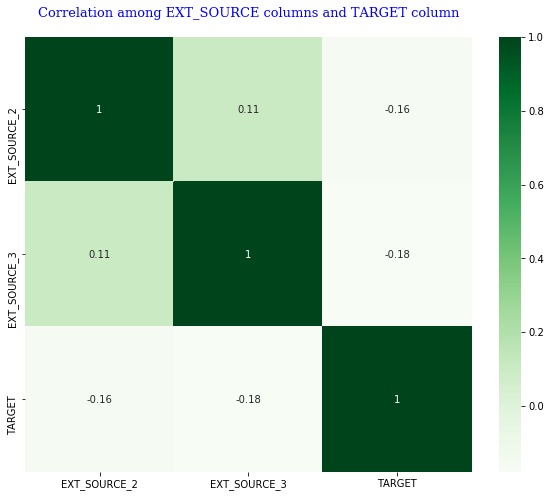

In [19]:
#Let's use a heatmap for better visualization.
plt.figure(figsize = [10,8])

sns.heatmap(corr_1, cmap = 'Greens', annot = True)
plt.title('Correlation among EXT_SOURCE columns and TARGET column', fontdict = title_font, pad = 20)
plt.show()

### From the above plot we can see that there is very little correlation among these columns but this is no conclusive proof that these columns are not useful for our analysis, so we decided to keep these columns.

### 1.1.2 Imputing the remaining null values using appropriate aggregate values.

In [20]:
#Checking columns with more than 0% null values.
print('Null value percentage in each column\n')
print(check_null_perc(a_data)[check_null_perc(a_data) > 0],'\n')

#There are some more columns that have null values but are not showing up in the percentage null values so lets use the check_null_values function we created in the above cells.
print('Null value count in each column\n')
print(check_null_values(a_data)[check_null_values(a_data) > 0])

Null value percentage in each column

OCCUPATION_TYPE               31.35
EXT_SOURCE_3                  19.83
AMT_REQ_CREDIT_BUREAU_YEAR    13.50
AMT_REQ_CREDIT_BUREAU_MON     13.50
AMT_REQ_CREDIT_BUREAU_WEEK    13.50
AMT_REQ_CREDIT_BUREAU_DAY     13.50
AMT_REQ_CREDIT_BUREAU_HOUR    13.50
AMT_REQ_CREDIT_BUREAU_QRT     13.50
NAME_TYPE_SUITE                0.42
OBS_30_CNT_SOCIAL_CIRCLE       0.33
DEF_30_CNT_SOCIAL_CIRCLE       0.33
OBS_60_CNT_SOCIAL_CIRCLE       0.33
DEF_60_CNT_SOCIAL_CIRCLE       0.33
EXT_SOURCE_2                   0.21
AMT_GOODS_PRICE                0.09
dtype: float64 

Null value count in each column

OCCUPATION_TYPE               96391
EXT_SOURCE_3                  60965
AMT_REQ_CREDIT_BUREAU_YEAR    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_HOUR    41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
NAME_TYPE_SUITE                1292
OBS_30_CNT_SOCIAL_CIRCLE       1021
DEF_30_CNT_S

### 1.1.3 Let's start by imputing values for OCCUPATION_TYPE column.

In [21]:
#Checking all the distinct values in OCCUPATIOIN_TYPE and their counts.
a_data.OCCUPATION_TYPE.value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

#### From the above code cell, we can infer that OCCUPATION_TYPE is a categorical column, imputing the values with the mode value could have been a good idea, if only this column had less missing values but since it has 31% missing values, we cannot consider replacing them with the mode value.

#### Let's replace the null values with something more descriptive.

In [22]:
#Replacing all the null values in OCCUPATION_TYPE with 'UNKNOWN'.
a_data.OCCUPATION_TYPE = a_data.OCCUPATION_TYPE.fillna('UNKNOWN')

In [23]:
#Replaced all the null values in OCCUPATION_TYPE successfully.
a_data.OCCUPATION_TYPE.isnull().sum()

0

In [24]:
plt.style.use('seaborn')

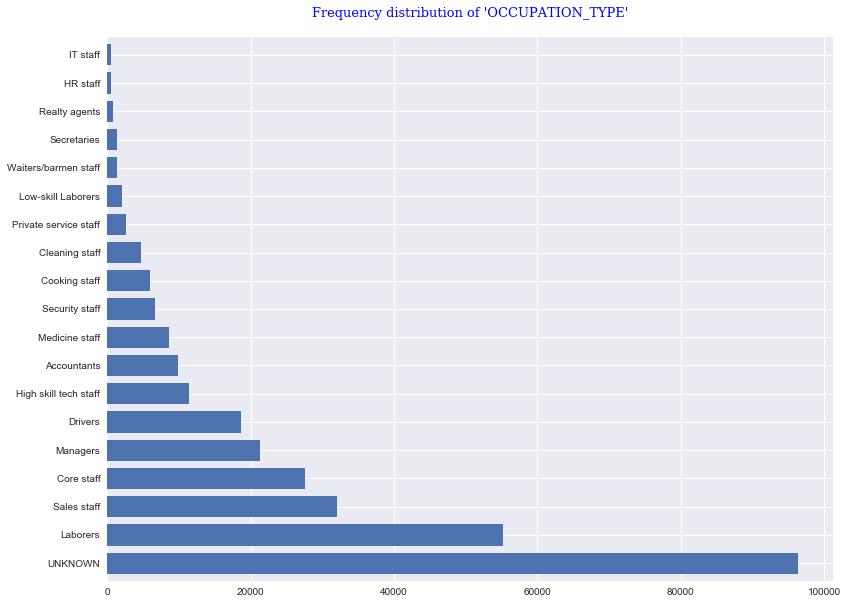

In [25]:
#Now let's use a distribution plot to get some insight into how the values are distributed throughout the OCCUPATION_TYPE column.
plt.figure(figsize  = [13,10])
plt.style.use('seaborn')
a_data.OCCUPATION_TYPE.value_counts().plot.barh(width = 0.75)
plt.title("Frequency distribution of 'OCCUPATION_TYPE'", fontdict = title_font, pad = 20)
plt.show()

#### 'Laborers' is the category with the highest value count after 'UNKNOWN' and 'IT staff' is the category with the lowest value count.

### 1.1.4 Let's move to the next column with null values i.e. EXT_SOURCE_3

In [26]:
#Checking the EXT_SOURCE_3 column
a_data.EXT_SOURCE_3.describe()

count    246546.000000
mean          0.510853
std           0.194844
min           0.000527
25%           0.370650
50%           0.535276
75%           0.669057
max           0.896010
Name: EXT_SOURCE_3, dtype: float64

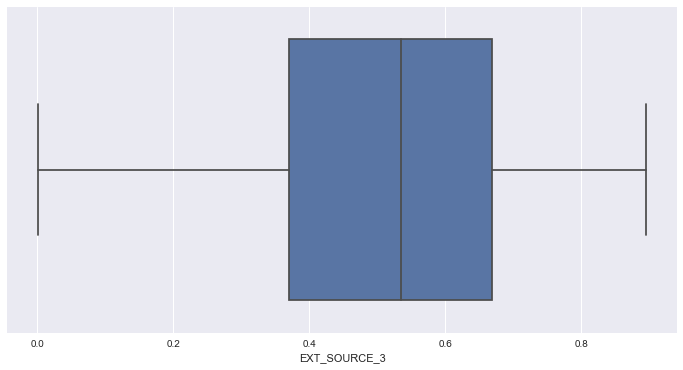

In [27]:
#Let's check if it's continuous or are there any outliers present in this column using a boxplot.
plt.figure(figsize = [12,6])
sns.boxplot(a_data['EXT_SOURCE_3'])
plt.show()

#### There seems to be no outlier values in this particular column so it is safe to assume that we can impute the null values with the mean value.

In [28]:
#Imputing the null values of EXT_SOURCE_3 with mean value.
a_data.EXT_SOURCE_3 = a_data.EXT_SOURCE_3.fillna(a_data.EXT_SOURCE_3.mean())

### 1.1.5 Now let's check all the amt_req columns that have 13.5% of their values as null values and see how we can deal with these null values.

In [29]:
#Storing the amt_req columns in a list.
amt_req_cols = [x for x in check_null_perc(a_data)[check_null_perc(a_data) > 10].index if x.startswith('AMT')]
amt_req_cols

['AMT_REQ_CREDIT_BUREAU_YEAR',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_QRT']

In [30]:
#Now let's check the numeric values in all these amt_req columns
a_data[amt_req_cols].describe()

,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_QRT
count,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,1.899974,0.267395,0.034362,0.007000,0.006402,0.265474
std,1.869295,0.916002,0.204685,0.110757,0.083849,0.794056
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,25.000000,27.000000,8.000000,9.000000,4.000000,261.000000


#### According to their description that says "Number of enquiries to Credit Bureau about the client", we the missing values are not Missing at random, these values could be swapped with the median value of these columns.

In [31]:
#Imputing the null values of all the amt_req columns with their median value.
for i in amt_req_cols:
    a_data[i] = a_data[i].fillna(a_data[i].median())

In [32]:
#Rechecking all the null values we are left with using the check_null_values function we created in the above sections of this notebook.
check_null_values(a_data)[check_null_values(a_data) > 0]

NAME_TYPE_SUITE             1292
DEF_30_CNT_SOCIAL_CIRCLE    1021
DEF_60_CNT_SOCIAL_CIRCLE    1021
OBS_30_CNT_SOCIAL_CIRCLE    1021
OBS_60_CNT_SOCIAL_CIRCLE    1021
EXT_SOURCE_2                 660
AMT_GOODS_PRICE              278
AMT_ANNUITY                   12
CNT_FAM_MEMBERS                2
DAYS_LAST_PHONE_CHANGE         1
dtype: int64

### 1.1.6 Dealing with null values in NAME_TYPE_SUITE column.

In [33]:
#Exploring the NAME_TYPE_SUITE column.
a_data.NAME_TYPE_SUITE

0         Unaccompanied
1                Family
2         Unaccompanied
3         Unaccompanied
4         Unaccompanied
              ...      
307506    Unaccompanied
307507    Unaccompanied
307508    Unaccompanied
307509    Unaccompanied
307510    Unaccompanied
Name: NAME_TYPE_SUITE, Length: 307511, dtype: object

In [34]:
#Checking the count of each value in the NAME_TYPE_SUITE column.
a_data.NAME_TYPE_SUITE.value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

#### From the above code cells it is clear that this is a categorical variable, so imputing the null values with mean or median is not an option here.
#### Unaccompanied seems to be the most frequent value in this column,also the count of Unaccompanied is 6.19 times more than the next most frequent value i.e. Family, so let's impute the null values using that.

In [35]:
#Imputing the null values using the most frequently occuring value in the NAME_TYPE_SUITE column.
a_data.NAME_TYPE_SUITE = a_data.NAME_TYPE_SUITE.fillna(a_data.NAME_TYPE_SUITE.mode()[0])

In [36]:
a_data.NAME_TYPE_SUITE.isnull().sum()

0

In [37]:
a_data.NAME_TYPE_SUITE.value_counts()

Unaccompanied      249818
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

### 1.1.7 Let's deal with the cnt_social_circle columns.

In [38]:
#Checking all the null values again.
check_null_values(a_data)[check_null_values(a_data) > 0]

DEF_30_CNT_SOCIAL_CIRCLE    1021
DEF_60_CNT_SOCIAL_CIRCLE    1021
OBS_30_CNT_SOCIAL_CIRCLE    1021
OBS_60_CNT_SOCIAL_CIRCLE    1021
EXT_SOURCE_2                 660
AMT_GOODS_PRICE              278
AMT_ANNUITY                   12
CNT_FAM_MEMBERS                2
DAYS_LAST_PHONE_CHANGE         1
dtype: int64

In [39]:
#Storing all the cnt_social_circle columns with null values in a list.
cnt_social_circle = [x for x in check_null_values(a_data)[check_null_values(a_data) > 0].index if 'CNT_SOCIAL_CIRCLE' in x]
cnt_social_circle

['DEF_30_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE']

In [40]:
#Let's check the numeric values in the cnt_social_circle columns
a_data[cnt_social_circle].describe()

,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE
count,306490.000000,306490.000000,306490.000000,306490.000000
mean,0.143421,0.100049,1.422245,1.405292
std,0.446698,0.362291,2.400989,2.379803
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,2.000000,2.000000
max,34.000000,24.000000,348.000000,344.000000


#### So according to their column description all these social_circle columns are basically observations of client's social surroundings.
#### Imputing the null values with the median seems to be a good idea in this case(looking at the numeric description of the columns).

In [41]:
#Imputing the null values in cnt_social_circle columns with their median value.
for i in cnt_social_circle:
    a_data[i] = a_data[i].fillna(a_data[i].median())

In [42]:
#Imputed the null values in cnt_social_columns successfully.
check_null_values(a_data)[check_null_values(a_data) > 0]

EXT_SOURCE_2              660
AMT_GOODS_PRICE           278
AMT_ANNUITY                12
CNT_FAM_MEMBERS             2
DAYS_LAST_PHONE_CHANGE      1
dtype: int64

### 1.1.8 Dealing with the null values in the remaining columns.

In [43]:
#Checking numeric values in the remaining columns with null values.
a_data[(check_null_values(a_data)[check_null_values(a_data) > 0].index)].describe()

,EXT_SOURCE_2,AMT_GOODS_PRICE,AMT_ANNUITY,CNT_FAM_MEMBERS,DAYS_LAST_PHONE_CHANGE
count,3.068510e+05,3.072330e+05,307499.000000,307509.000000,307510.000000
mean,5.143927e-01,5.383962e+05,27108.573909,2.152665,-962.858788
std,1.910602e-01,3.694465e+05,14493.737315,0.910682,826.808487
min,8.173617e-08,4.050000e+04,1615.500000,1.000000,-4292.000000
25%,3.924574e-01,2.385000e+05,16524.000000,2.000000,-1570.000000
50%,5.659614e-01,4.500000e+05,24903.000000,2.000000,-757.000000
75%,6.636171e-01,6.795000e+05,34596.000000,3.000000,-274.000000
max,8.549997e-01,4.050000e+06,258025.500000,20.000000,0.000000


#### DAYS_LAST_PHONE_CHANGE describes "How many days before application did client change phone" but it has all the values as negative, we are going to mark it, to fix it at a later stage.

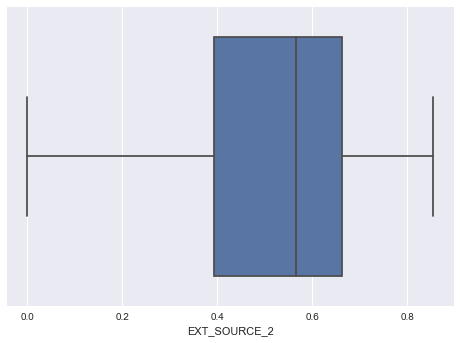

In [44]:
#In the EXT_SOURCE_2 column we can use either mean or median as both the values are very close, still let's check it using a boxplot.
sns.boxplot(a_data.EXT_SOURCE_2)
plt.show()

In [45]:
#Since there are no outliers, it is safe to impute the values with the mean value.
a_data.EXT_SOURCE_2 = a_data.EXT_SOURCE_2.fillna(a_data.EXT_SOURCE_2.mean())
a_data.EXT_SOURCE_2.isnull().sum()

0

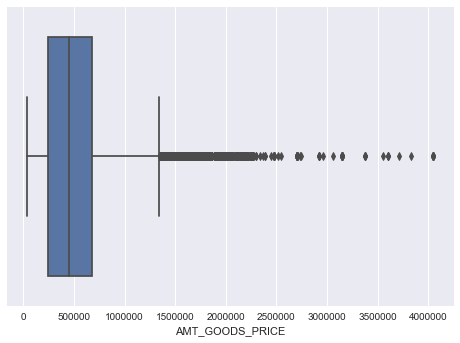

In [46]:
#Checking AMT_GOODS_PRICE column
sns.boxplot(a_data.AMT_GOODS_PRICE)
plt.show()

In [47]:
#From the above plot we can conclude that there are outliers in the AMT_GOODS_PRICE column so let's impute the null values with the median value.
a_data.AMT_GOODS_PRICE = a_data.AMT_GOODS_PRICE.fillna(a_data.AMT_GOODS_PRICE.median())
a_data.AMT_GOODS_PRICE.isnull().sum()

0

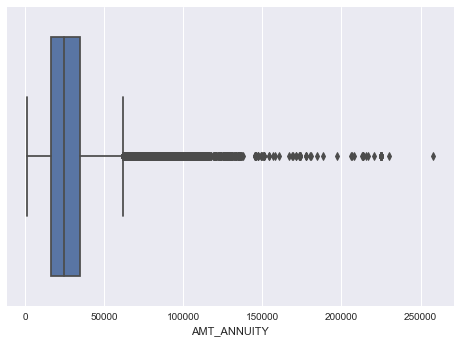

In [48]:
#Moving on to AMT_ANNUITY.
sns.boxplot(a_data.AMT_ANNUITY)
plt.show()

In [49]:
#This column also has outliers so immputing values using the mean value looks like a bad idea, let's impute this with the median value as well.
a_data.AMT_ANNUITY = a_data.AMT_ANNUITY.fillna(a_data.AMT_ANNUITY.median())
a_data.AMT_ANNUITY.isnull().sum()

0

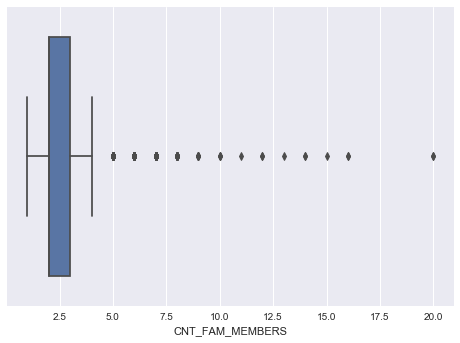

In [50]:
#Moving on to the last column with null values CNT_FAM_MEMBERS.
sns.boxplot(a_data.CNT_FAM_MEMBERS)
plt.show()

In [51]:
#Again we should impute the values with the median value.
a_data.CNT_FAM_MEMBERS = a_data.CNT_FAM_MEMBERS.fillna(a_data.CNT_FAM_MEMBERS.median())
a_data.CNT_FAM_MEMBERS.isnull().sum()

0

In [52]:
check_null_values(a_data)[check_null_values(a_data) > 1]

Series([], dtype: int64)

### We are done with imputing and handling null values.
## 1.2 - Now let's get started with fixing columns and standardising the values.

In [53]:
#Let's check the info once again to get a better view at what kind of data we are dealing with here.
a_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307511 non-null  float64
 10  AMT_GOODS_PRICE              307511 non-null  float64
 11  NAME_TYPE_SUITE              307511 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [54]:
a_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307511.000000,3.075110e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.487841,5.383163e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.005538,0.006055,0.029723,0.231293,0.229631,1.778463
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.461065,3.692890e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.078014,0.103037,0.190728,0.856810,0.744059,1.765523
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


### 1.2.1 The first thing that we want to deal with is the negative values in the days columns, which makes little to no sense without any external cogent arguement in favor of it.

In [55]:
#Let's get all the days columns in a single list so that we can actually see what's going on in them.
days_cols = [x for x in a_data.columns if 'DAYS' in x]
days_cols

['DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE']

In [56]:
#Now let's see the values in all these columns.
a_data[days_cols].describe()

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE
count,307511.000000,307511.000000,307511.000000,307511.000000,307510.000000
mean,-16036.995067,63815.045904,-4986.120328,-2994.202373,-962.858788
std,4363.988632,141275.766519,3522.886321,1509.450419,826.808487
min,-25229.000000,-17912.000000,-24672.000000,-7197.000000,-4292.000000
25%,-19682.000000,-2760.000000,-7479.500000,-4299.000000,-1570.000000
50%,-15750.000000,-1213.000000,-4504.000000,-3254.000000,-757.000000
75%,-12413.000000,-289.000000,-2010.000000,-1720.000000,-274.000000
max,-7489.000000,365243.000000,0.000000,0.000000,0.000000


#### By looking at this we can see that almost all the values in these columns are negative except for DAYS_EMPLOYED column which has positive values greater than 0.
#### Just as expected, we checked the column description of  these columns and found that these columns have false negative values, so let's convert these negative values into positive.

In [57]:
#We are going to use the abs function to fix these values.
a_data[days_cols] = a_data[days_cols].abs()
a_data[days_cols].describe()

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE
count,307511.000000,307511.000000,307511.000000,307511.000000,307510.000000
mean,16036.995067,67724.742149,4986.120328,2994.202373,962.858788
std,4363.988632,139443.751806,3522.886321,1509.450419,826.808487
min,7489.000000,0.000000,0.000000,0.000000,0.000000
25%,12413.000000,933.000000,2010.000000,1720.000000,274.000000
50%,15750.000000,2219.000000,4504.000000,3254.000000,757.000000
75%,19682.000000,5707.000000,7479.500000,4299.000000,1570.000000
max,25229.000000,365243.000000,24672.000000,7197.000000,4292.000000


### 1.2.2 Now that we are done with fixing the values in the days columns, let's convert some of these columns to years in such a way that they can be used for further analysis with the target variable.

In [58]:
#First let's convert the DAYS_BIRTH into AGE or AGE group. 
#Here since it is age, we are using int() instead of round().
a_data['AGE'] = a_data.DAYS_BIRTH.apply(lambda x: int(x/365))
a_data.AGE.head()

0    25
1    45
2    52
3    52
4    54
Name: AGE, dtype: int64

### Outlier alert - 
* Now, before converting the DAYS_EMPLOYED in to years we can see in the above description of this numerical variable that the max value is '365243' which is totally not normal
* How can someone be employed for that many days, looks like some kind of discrepancy, so before converting the values into years let's make a boxplot and fix the outliers.

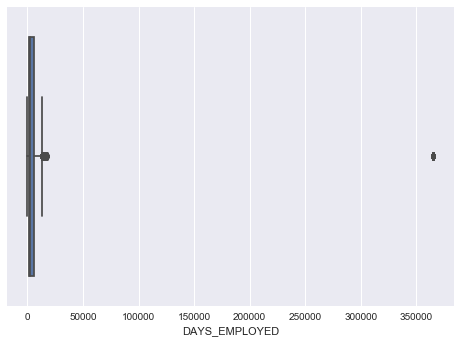

In [59]:
sns.boxplot(a_data.DAYS_EMPLOYED)
plt.show()

#### As expected, this is obviously an outlier, which we need to fix asap, as it is a pretty huge value.

In [60]:
a_data.shape

(307511, 74)

In [61]:
#Let's impute the extreme values with the median value.
a_data.DAYS_EMPLOYED = np.where(a_data.DAYS_EMPLOYED > 300000, a_data.DAYS_EMPLOYED.median(), a_data.DAYS_EMPLOYED)
a_data.DAYS_EMPLOYED.describe()

count    307511.000000
mean       2354.427019
std        2118.332916
min           0.000000
25%         933.000000
50%        2219.000000
75%        2760.000000
max       17912.000000
Name: DAYS_EMPLOYED, dtype: float64

In [62]:
a_data.shape

(307511, 74)

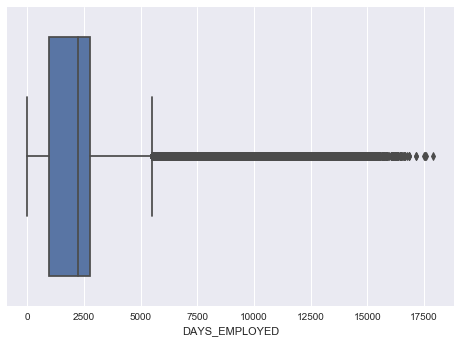

In [63]:
#Let's check again.
sns.boxplot(a_data.DAYS_EMPLOYED)
plt.show()

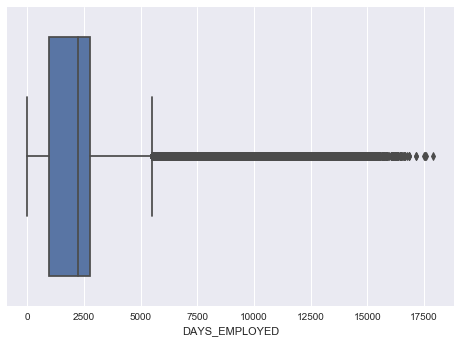

In [64]:
#Now it looks fine, let's agin plot a boxplot to be sure.
sns.boxplot(a_data.DAYS_EMPLOYED)
plt.show()

#### Still there are some pretty big values in there considering it is a variable storing the employment tenure of people, although the values are kind of huge but these values are very much possible.

#### This "AGE" column is the client's age  in years at the time of application.

In [65]:
#Let's also convert DAYS_EMPLOYED into YEARS_EMPLOYED for easier understanding.
#In this case it is years_employes, So we are rounding the result to one decimal point.
a_data["YEARS_EMPLOYED"] = a_data.DAYS_EMPLOYED.apply(lambda x: round(x/365,1))
a_data.YEARS_EMPLOYED.head()

0    1.7
1    3.3
2    0.6
3    8.3
4    8.3
Name: YEARS_EMPLOYED, dtype: float64

#### The "YEARS_EMPLOYED" column is the number of years the person started current employment before the application.
#### We might not need to convert the remaining "DAYS" columns into years as they are fine as they are.

#### We can bin these two columns so as to use them as categorical variables, but let's do it further along the EDA.

### NOTE-: Also at a later stage we will delete the DAYS_BIRTH and DAYS_EMPLOYED (as they do not serve any real purpose in further analysis) columns with some other columns so that our dataframe does not get redundant.

In [66]:
a_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,YEARS_EMPLOYED
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307511.000000,3.075110e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.487841,5.383163e+05,0.020868,16036.995067,2354.427019,...,0.000507,0.000335,0.005538,0.006055,0.029723,0.231293,0.229631,1.778463,43.435968,6.454131
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.461065,3.692890e+05,0.013831,4363.988632,2118.332916,...,0.022518,0.018299,0.078014,0.103037,0.190728,0.856810,0.744059,1.765523,11.954593,5.803510
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,7489.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,12413.000000,933.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,34.000000,2.600000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,15750.000000,2219.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,43.000000,6.100000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,19682.000000,2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,53.000000,7.600000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,25229.000000,17912.000000,...,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000,69.000000,49.100000


### 1.2.3 As we can see the AMT columns have some pretty bulky values which in some cases are hard to read, we can either convert these seemingly numerical values in categorical variables by binning them or we can convert these values into a more readable string format e.g. 3M or 3L.

### As far as our analysis goes, we don't think converting these values in string format would be or any use, if anything it might make it harder for us to analyze this variable with other variables, so we are going to bin these values into a categorical layout.

In [67]:
#Let's store all the AMT(not just the AMT_REQ columns) columns in a list.
amt_cols = [x for x in a_data if 'AMT' in x]
amt_cols

['AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

In [68]:
#Let's check again if all these columns need binning or not.
a_data[amt_cols].describe()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,3.075110e+05,3.075110e+05,307511.000000,3.075110e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,1.687979e+05,5.990260e+05,27108.487841,5.383163e+05,0.005538,0.006055,0.029723,0.231293,0.229631,1.778463
std,2.371231e+05,4.024908e+05,14493.461065,3.692890e+05,0.078014,0.103037,0.190728,0.856810,0.744059,1.765523
min,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [69]:
#Since the "AMT_REQ columns" have totally different kind of values, we don't need to bin them.
amt_cols = [x for x in amt_cols if 'REQ' not in x]
amt_cols

['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE']

#### The above two code cells are not necessary but we wrote them for better understanding.

In [70]:
#RUN ONLY ONCE.
#Now that we are done with selecting the columns let's get into binning them.
#Converting the values of all the required columns into LAKHS first.

for i in amt_cols:
    a_data[i] = round(a_data[i]/100000,3)
    print(a_data[i].head())

0    2.025
1    2.700
2    0.675
3    1.350
4    1.215
Name: AMT_INCOME_TOTAL, dtype: float64
0     4.066
1    12.935
2     1.350
3     3.127
4     5.130
Name: AMT_CREDIT, dtype: float64
0    0.247
1    0.357
2    0.068
3    0.297
4    0.219
Name: AMT_ANNUITY, dtype: float64
0     3.510
1    11.295
2     1.350
3     2.970
4     5.130
Name: AMT_GOODS_PRICE, dtype: float64


#### Although it is a bit harder to read the values like 0.068, it is gonna work good for analysis purposes.

### AMT_INCOME_TOTAL Column

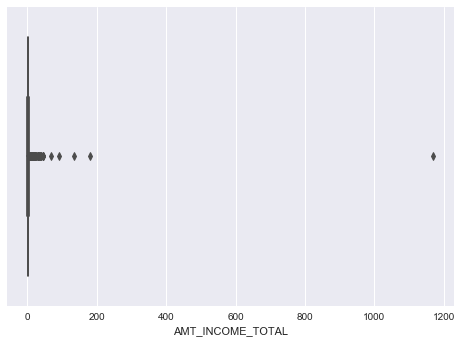

In [71]:
#The max value in this column seems to be a little to big, so let's check for any outliers to be sure.
sns.boxplot(a_data.AMT_INCOME_TOTAL)
plt.show()

In [72]:
#There are outliers in this columns, let's impute them with the median value.
a_data['AMT_INCOME_TOTAL'] = np.where(a_data.AMT_INCOME_TOTAL > 100, a_data.AMT_INCOME_TOTAL.median(), a_data.AMT_INCOME_TOTAL)
a_data.AMT_INCOME_TOTAL

0         2.025
1         2.700
2         0.675
3         1.350
4         1.215
          ...  
307506    1.575
307507    0.720
307508    1.530
307509    1.710
307510    1.575
Name: AMT_INCOME_TOTAL, Length: 307511, dtype: float64

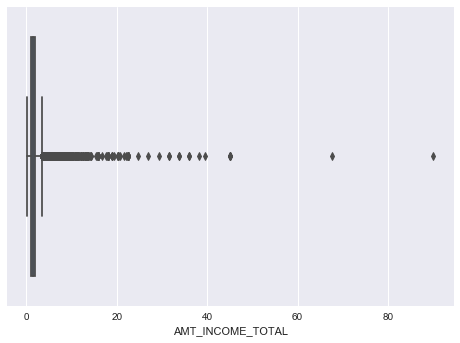

In [73]:
sns.boxplot(a_data.AMT_INCOME_TOTAL)
plt.show()

#### It looks like there still are outliers in this column, but reading the description suggests that it could have some high values as it is the client's income total.

In [74]:
#Now, creating buckets of gap 10 and the end bucket stops at 200L.
cuts = [0,1,2,3,4,5,6,7,8,9,10,200]
buckets = ['0-1L','1L-2L', '2L-3L','3L-4L','4L-5L','5L-6L','6L-7L','7L-8L','8L-9L','9L-10L','More than 10L']
a_data['AMT_INCOME_TOTAL_BUCKET'] = pd.cut(a_data.AMT_INCOME_TOTAL, bins = cuts, labels = buckets)

In [75]:
#Let's check the results.
a_data.AMT_INCOME_TOTAL_BUCKET.head()

0    2L-3L
1    2L-3L
2     0-1L
3    1L-2L
4    1L-2L
Name: AMT_INCOME_TOTAL_BUCKET, dtype: category
Categories (11, object): [0-1L < 1L-2L < 2L-3L < 3L-4L ... 7L-8L < 8L-9L < 9L-10L < More than 10L]

In [76]:
a_data.AMT_INCOME_TOTAL.head()

0    2.025
1    2.700
2    0.675
3    1.350
4    1.215
Name: AMT_INCOME_TOTAL, dtype: float64

### AMT_CREDIT Column

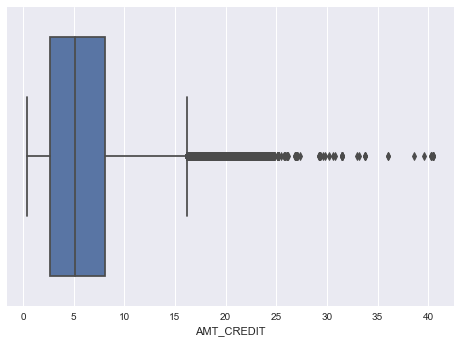

In [77]:
#Let's check for outliers in this column as well.
sns.boxplot(a_data.AMT_CREDIT)
plt.show()

In [78]:
#These don't look like outlier values, so let's go ahead with our binning process.
a_data['AMT_CREDIT_BUCKET'] = pd.cut(a_data.AMT_CREDIT, bins = cuts, labels = buckets)

In [79]:
#Checking the result.
a_data.AMT_CREDIT_BUCKET.head()

0            4L-5L
1    More than 10L
2            1L-2L
3            3L-4L
4            5L-6L
Name: AMT_CREDIT_BUCKET, dtype: category
Categories (11, object): [0-1L < 1L-2L < 2L-3L < 3L-4L ... 7L-8L < 8L-9L < 9L-10L < More than 10L]

In [80]:
a_data.AMT_CREDIT.head()

0     4.066
1    12.935
2     1.350
3     3.127
4     5.130
Name: AMT_CREDIT, dtype: float64

### AMT_ANNUITY Column

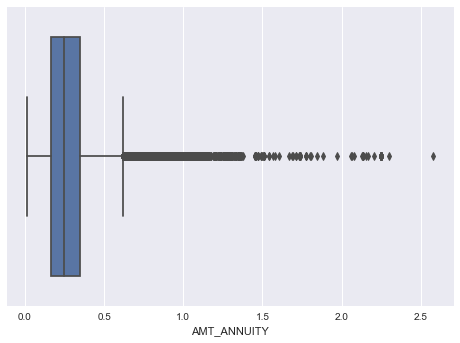

In [81]:
#AMT_ANNUITY boxplot
sns.boxplot(a_data.AMT_ANNUITY)
plt.show()

In [82]:
#Doesn't look like a problem here either.
a_data['AMT_ANNUITY_BUCKET'] = pd.cut(a_data.AMT_ANNUITY, bins = cuts, labels = buckets)

In [83]:
#Checking the result.
a_data.AMT_ANNUITY_BUCKET.head()

0    0-1L
1    0-1L
2    0-1L
3    0-1L
4    0-1L
Name: AMT_ANNUITY_BUCKET, dtype: category
Categories (11, object): [0-1L < 1L-2L < 2L-3L < 3L-4L ... 7L-8L < 8L-9L < 9L-10L < More than 10L]

In [84]:
a_data.AMT_ANNUITY.head()

0    0.247
1    0.357
2    0.068
3    0.297
4    0.219
Name: AMT_ANNUITY, dtype: float64

### AMT_GOODS_PRICE Column

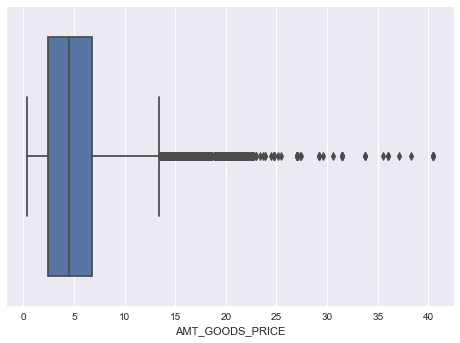

In [85]:
#AMT_GOODS_PRICE boxplot
sns.boxplot(a_data.AMT_GOODS_PRICE)
plt.show()

In [86]:
#There seem to be no outlier in this column either, that could harm our analysis.
a_data['AMT_GOODS_PRICE_BUCKET'] = pd.cut(a_data.AMT_GOODS_PRICE, bins = cuts, labels = buckets)

In [87]:
a_data.AMT_GOODS_PRICE_BUCKET.head()

0            3L-4L
1    More than 10L
2            1L-2L
3            2L-3L
4            5L-6L
Name: AMT_GOODS_PRICE_BUCKET, dtype: category
Categories (11, object): [0-1L < 1L-2L < 2L-3L < 3L-4L ... 7L-8L < 8L-9L < 9L-10L < More than 10L]

In [88]:
a_data.AMT_GOODS_PRICE.head()

0     3.510
1    11.295
2     1.350
3     2.970
4     5.130
Name: AMT_GOODS_PRICE, dtype: float64

In [89]:
a_data.shape

(307511, 79)

### 1.2.4 FLAG Columns and their relation with the target variable.

### Description - 
* Looking into the description of the flag variables, we found that there is a group of document flag variables which contain information about whether the client has provided a certain type of document or not.
* Then there are some other flag variables as well that have the information about the whether the client owns a certain kind of object or not or whether the client has provided a particular information or not like mobile number etc.

In [90]:
#First let's store all these flag variables in a list.
flag_cols = [x for x in a_data if 'FLAG' in x]
print(flag_cols,'\n')
print("There are",len(flag_cols),'Flag columns')

['FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21'] 

There are 28 Flag columns


#### Just to be safe let's store these flag column in another dataframe, so that if we need any of these flag columns we can use them at any point in the analysis.

In [91]:
#Let's create another dataframe with all the flag variables and target variable to analyze them and identify which ones are important for our analysis.
flag_df = a_data[flag_cols + ['TARGET']]
flag_df.head()

,FLAG_OWN_CAR,FLAG_OWN_REALTY,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,...,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,TARGET
0,N,Y,1,1,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,N,N,1,1,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,Y,Y,1,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,N,Y,1,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,N,Y,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [92]:
#As we know from the column description, 1 represents 'YES' and 0 represents 'NO' so let's convert these 1's and 0's to 
#'Y' and 'N' respectively, which will make it easier for us to read the plots.
for i in flag_cols:
    flag_df[i] = flag_df[i].replace({1: 'Y',0: 'N'})

In [93]:
#Let's check.
flag_df.head()

,FLAG_OWN_CAR,FLAG_OWN_REALTY,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,...,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,TARGET
0,N,Y,Y,Y,N,Y,Y,N,N,Y,...,N,N,N,N,N,N,N,N,N,1
1,N,N,Y,Y,N,Y,Y,N,N,Y,...,N,N,N,N,N,N,N,N,N,0
2,Y,Y,Y,Y,Y,Y,Y,N,N,N,...,N,N,N,N,N,N,N,N,N,0
3,N,Y,Y,Y,N,Y,N,N,N,Y,...,N,N,N,N,N,N,N,N,N,0
4,N,Y,Y,Y,N,Y,N,N,N,N,...,N,N,N,N,N,N,N,N,N,0


In [94]:
#While we are at it, let's also convert the 0 and 1 values in the target column as 'Defaulter' and 'Not-Defaulter' respectively.
flag_df['TARGET'] = flag_df['TARGET'].replace({0:'Non-Defaulter', 1:'Defaulter'})
flag_df.TARGET.head()

0        Defaulter
1    Non-Defaulter
2    Non-Defaulter
3    Non-Defaulter
4    Non-Defaulter
Name: TARGET, dtype: object

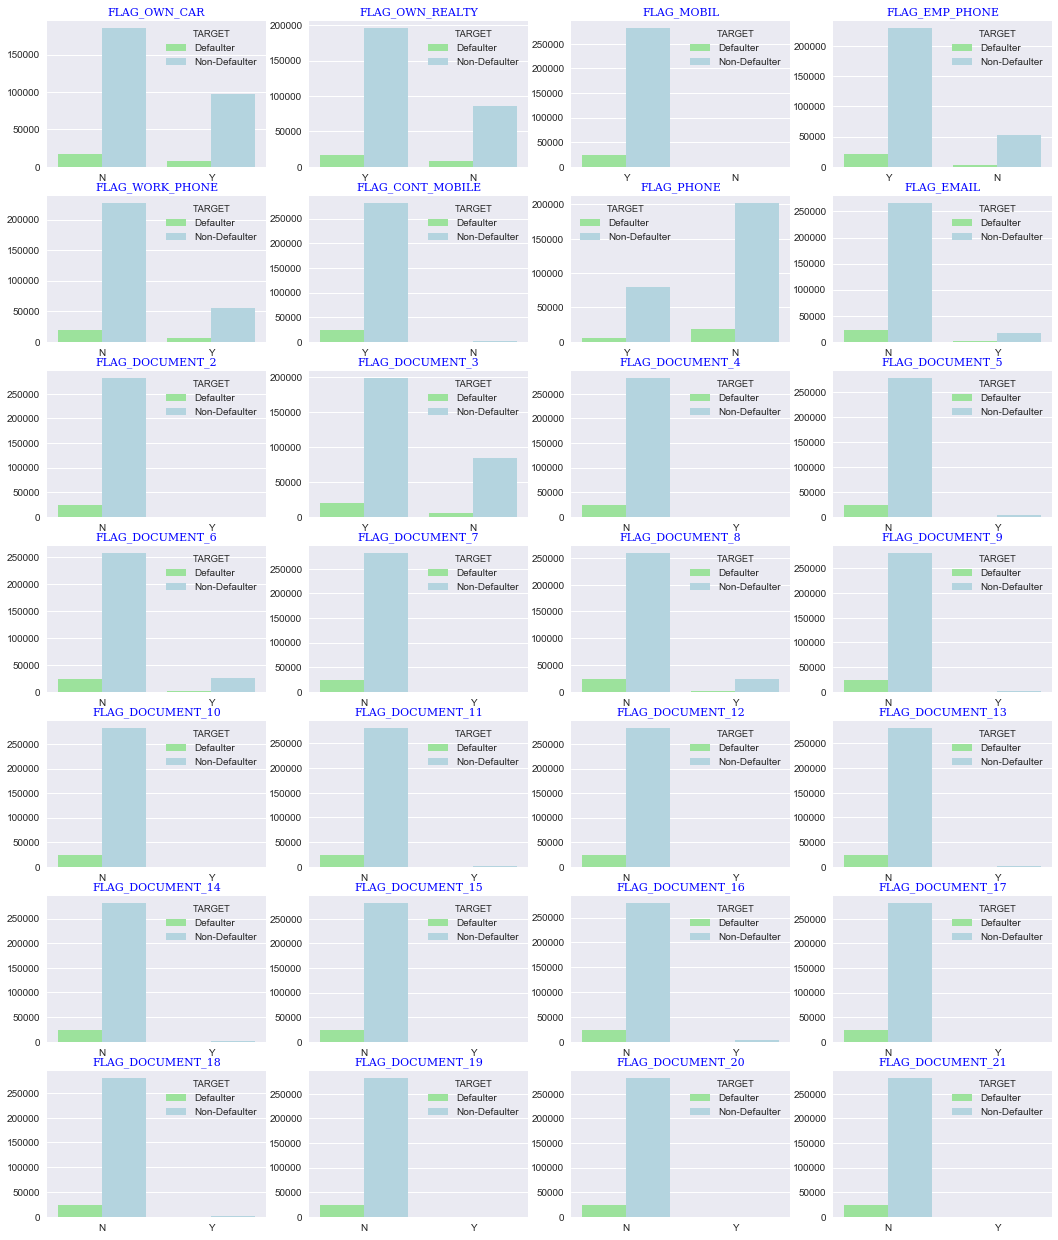

In [95]:
#Let's plot all these variables in reference to the TARGET variable and see which ones are useful.
plt.figure(figsize = [18,22])
for i,j in zip(flag_cols,range(len(flag_cols))):
    plt.subplot(7,4,j+1)
    ax = sns.countplot(flag_df[i], hue = flag_df.TARGET, palette = ["lightgreen","lightblue"])
    plt.xlabel("")
    plt.ylabel("")
    plt.title(i,fontdict = {'family' : 'serif', 'color' :'blue', 'weight' : '5', 'size' : 11})

### INSIGHTS-:
#### From the above plot, we can say one  thing for sure, that there are significantly more Non-Defaulters in a few columns, namely (FLAG_OWN_CAR, FLAG_OWN_REALITY ,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL, FLAG_DOCUMENT_3) than  the other columns so let's keep these and drop the other columns from our main "a_data" dataframe.
#### NOTE -: we are only dropping the other columns from a_data, if in case the other columns seem useful we can still use them using the flag_df dataframe.

### Let's also check what is the proportion of defaulter values to non defaulter values in the target column.

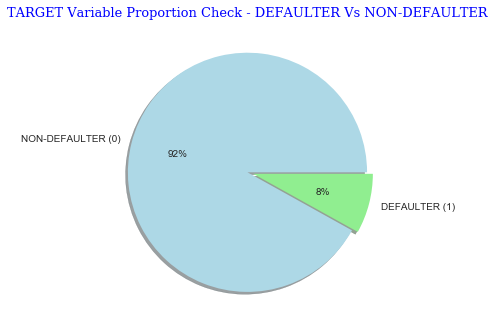

In [96]:
plt.pie(flag_df.TARGET.value_counts(normalize=True)*100,labels=['NON-DEFAULTER (0)','DEFAULTER (1)'],colors = ['lightblue','lightgreen'],explode=(0,0.05),autopct='%1.f%%',shadow = True)
plt.title('TARGET Variable Proportion Check - DEFAULTER Vs NON-DEFAULTER', fontdict = title_font)
plt.show()

#### INSIGHTS-:
#### It is very clear that there is an imbalance between people who defaulted and who didn't default. Nearly 91% of people didn't default as opposed to 9% who did.
#### We might need to dig a little deeper into this in the further parts of this EDA but for now let's stick to our task at hand i.e. sorting out the unnecessary flag columns.

In [97]:
#Now lets drop the unnecessary flag columns from a_data dataframe.
unnecessary_flag = [x for x in flag_df if x not in ['FLAG_OWN_CAR', 'FLAG_OWN_REALTY' ,'FLAG_WORK_PHONE','FLAG_PHONE','FLAG_EMAIL', 'FLAG_DOCUMENT_3','TARGET']]
unnecessary_flag

['FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21']

In [98]:
#RUN ONLY ONCE.
a_data.drop(unnecessary_flag, axis = 1, inplace = True)

In [99]:
a_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,YEARS_EMPLOYED,AMT_INCOME_TOTAL_BUCKET,AMT_CREDIT_BUCKET,AMT_ANNUITY_BUCKET,AMT_GOODS_PRICE_BUCKET
0,100002,1,Cash loans,M,N,Y,0,2.025,4.066,0.247,...,0.0,0.0,0.0,1.0,25,1.7,2L-3L,4L-5L,0-1L,3L-4L
1,100003,0,Cash loans,F,N,N,0,2.700,12.935,0.357,...,0.0,0.0,0.0,0.0,45,3.3,2L-3L,More than 10L,0-1L,More than 10L
2,100004,0,Revolving loans,M,Y,Y,0,0.675,1.350,0.068,...,0.0,0.0,0.0,0.0,52,0.6,0-1L,1L-2L,0-1L,1L-2L
3,100006,0,Cash loans,F,N,Y,0,1.350,3.127,0.297,...,0.0,0.0,0.0,1.0,52,8.3,1L-2L,3L-4L,0-1L,2L-3L
4,100007,0,Cash loans,M,N,Y,0,1.215,5.130,0.219,...,0.0,0.0,0.0,0.0,54,8.3,1L-2L,5L-6L,0-1L,5L-6L


### 1.2.5 Let's also see what's going on in the CODE_GENDER column and also convert the values from 'M' and 'F' to 'Male' and 'Female' respectively.

In [100]:
a_data.CODE_GENDER.value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

#### The XNA values in the CODE_GENDER column are very few and don't have any meaning to them, so dropping them seems to be the best way to deal with it.

In [101]:
a_data = a_data[a_data.CODE_GENDER != 'XNA']

In [102]:
#Also let's make m and f as male and female.
a_data.CODE_GENDER = a_data.CODE_GENDER.apply(lambda x: 'MALE' if(x == 'M') else 'FEMALE')
a_data.CODE_GENDER

0           MALE
1         FEMALE
2           MALE
3         FEMALE
4           MALE
           ...  
307506      MALE
307507    FEMALE
307508    FEMALE
307509    FEMALE
307510    FEMALE
Name: CODE_GENDER, Length: 307507, dtype: object

## 1.3 By getting a closer look at the remaining columns in our a_data dataframe, we found that the below mentioned columns might not provide any value to our analysis so, we decided to create a new dataframe, that will include all the columns other than the below mentioned columns.

['CNT_CHILDREN',
 'NAME_TYPE_SUITE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_ID_PUBLISH',
 'FLAG_WORK_PHONE',
 'FLAG_PHONE',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'FLAG_DOCUMENT_3',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_YEAR',]

In [103]:
unnecessary_cols = ['CNT_CHILDREN','NAME_TYPE_SUITE','REGION_POPULATION_RELATIVE','DAYS_BIRTH','DAYS_ID_PUBLISH','FLAG_WORK_PHONE',
 'FLAG_PHONE',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'FLAG_DOCUMENT_3',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'DAYS_EMPLOYED']
print(len(unnecessary_cols))


27


In [104]:
a_data_main = a_data[a_data.columns.difference(unnecessary_cols)]
a_data_main.head()

,AGE,AMT_ANNUITY,AMT_ANNUITY_BUCKET,AMT_CREDIT,AMT_CREDIT_BUCKET,AMT_GOODS_PRICE,AMT_GOODS_PRICE_BUCKET,AMT_INCOME_TOTAL,AMT_INCOME_TOTAL_BUCKET,AMT_REQ_CREDIT_BUREAU_DAY,...,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,NAME_INCOME_TYPE,OCCUPATION_TYPE,ORGANIZATION_TYPE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,SK_ID_CURR,TARGET,YEARS_EMPLOYED
0,25,0.247,0-1L,4.066,4L-5L,3.510,3L-4L,2.025,2L-3L,0.0,...,Single / not married,House / apartment,Working,Laborers,Business Entity Type 3,2,2,100002,1,1.7
1,45,0.357,0-1L,12.935,More than 10L,11.295,More than 10L,2.700,2L-3L,0.0,...,Married,House / apartment,State servant,Core staff,School,1,1,100003,0,3.3
2,52,0.068,0-1L,1.350,1L-2L,1.350,1L-2L,0.675,0-1L,0.0,...,Single / not married,House / apartment,Working,Laborers,Government,2,2,100004,0,0.6
3,52,0.297,0-1L,3.127,3L-4L,2.970,2L-3L,1.350,1L-2L,0.0,...,Civil marriage,House / apartment,Working,Laborers,Business Entity Type 3,2,2,100006,0,8.3
4,54,0.219,0-1L,5.130,5L-6L,5.130,5L-6L,1.215,1L-2L,0.0,...,Single / not married,House / apartment,Working,Core staff,Religion,2,2,100007,0,8.3


In [105]:
a_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,YEARS_EMPLOYED,AMT_INCOME_TOTAL_BUCKET,AMT_CREDIT_BUCKET,AMT_ANNUITY_BUCKET,AMT_GOODS_PRICE_BUCKET
0,100002,1,Cash loans,MALE,N,Y,0,2.025,4.066,0.247,...,0.0,0.0,0.0,1.0,25,1.7,2L-3L,4L-5L,0-1L,3L-4L
1,100003,0,Cash loans,FEMALE,N,N,0,2.700,12.935,0.357,...,0.0,0.0,0.0,0.0,45,3.3,2L-3L,More than 10L,0-1L,More than 10L
2,100004,0,Revolving loans,MALE,Y,Y,0,0.675,1.350,0.068,...,0.0,0.0,0.0,0.0,52,0.6,0-1L,1L-2L,0-1L,1L-2L
3,100006,0,Cash loans,FEMALE,N,Y,0,1.350,3.127,0.297,...,0.0,0.0,0.0,1.0,52,8.3,1L-2L,3L-4L,0-1L,2L-3L
4,100007,0,Cash loans,MALE,N,Y,0,1.215,5.130,0.219,...,0.0,0.0,0.0,0.0,54,8.3,1L-2L,5L-6L,0-1L,5L-6L


In [106]:
print(a_data.shape)
print(a_data_main.shape)

(307507, 57)
(307507, 30)


###  *AGE bucketing - In the previous section (1.2.2), we converted the days_birth into age, now let's also bucket    age values so it becomes a categorical variable which will be easier for us to analyze.*

In [107]:
a_data_main.AGE.head()

0    25
1    45
2    52
3    52
4    54
Name: AGE, dtype: int64

In [108]:
cuts_age = [20,30,40,50,60,70,80,90,100,130]
buckets_age = ['20-30','30-40','40-50','50-60','60-70','70-80','80-90','90-100','More than 100']

a_data_main['AGE_BUCKET'] = pd.cut(a_data_main.AGE, bins = cuts_age, labels = buckets_age)

In [109]:
a_data_main.AGE_BUCKET.head()

0    20-30
1    40-50
2    50-60
3    50-60
4    50-60
Name: AGE_BUCKET, dtype: category
Categories (9, object): [20-30 < 30-40 < 40-50 < 50-60 ... 70-80 < 80-90 < 90-100 < More than 100]

#### Now we basically have 31 columns at our disposal so that we can analyse them.

# Part 2 - Data Analysis(a_data)

## 2.1 Due to the huge imbalance in the target variable, we are going to divide this dataframe into two parts, one where the target variable is 1 and the other with target variable as 0.

In [110]:
#Creating two new dataframes.
a_data_default = a_data_main[a_data_main.TARGET == 1]
a_data_default.head()

,AGE,AMT_ANNUITY,AMT_ANNUITY_BUCKET,AMT_CREDIT,AMT_CREDIT_BUCKET,AMT_GOODS_PRICE,AMT_GOODS_PRICE_BUCKET,AMT_INCOME_TOTAL,AMT_INCOME_TOTAL_BUCKET,AMT_REQ_CREDIT_BUREAU_DAY,...,NAME_HOUSING_TYPE,NAME_INCOME_TYPE,OCCUPATION_TYPE,ORGANIZATION_TYPE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,SK_ID_CURR,TARGET,YEARS_EMPLOYED,AGE_BUCKET
0,25,0.247,0-1L,4.066,4L-5L,3.510,3L-4L,2.025,2L-3L,0.0,...,House / apartment,Working,Laborers,Business Entity Type 3,2,2,100002,1,1.7,20-30
26,51,0.271,0-1L,9.800,9L-10L,7.020,7L-8L,1.125,1L-2L,0.0,...,House / apartment,Working,Cooking staff,Business Entity Type 3,3,2,100031,1,7.2,50-60
40,47,0.350,0-1L,11.936,More than 10L,8.550,8L-9L,2.025,2L-3L,0.0,...,House / apartment,Commercial associate,Laborers,Business Entity Type 3,2,2,100047,1,3.5,40-50
42,36,0.163,0-1L,2.889,2L-3L,2.385,2L-3L,1.350,1L-2L,0.0,...,House / apartment,Working,Sales staff,Self-employed,3,3,100049,1,9.9,30-40
81,67,0.146,0-1L,2.520,2L-3L,2.520,2L-3L,0.810,0-1L,0.0,...,House / apartment,Pensioner,UNKNOWN,XNA,2,2,100096,1,6.1,60-70


In [111]:
a_data_non_default = a_data_main[a_data_main.TARGET == 0]
a_data_non_default.head()

,AGE,AMT_ANNUITY,AMT_ANNUITY_BUCKET,AMT_CREDIT,AMT_CREDIT_BUCKET,AMT_GOODS_PRICE,AMT_GOODS_PRICE_BUCKET,AMT_INCOME_TOTAL,AMT_INCOME_TOTAL_BUCKET,AMT_REQ_CREDIT_BUREAU_DAY,...,NAME_HOUSING_TYPE,NAME_INCOME_TYPE,OCCUPATION_TYPE,ORGANIZATION_TYPE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,SK_ID_CURR,TARGET,YEARS_EMPLOYED,AGE_BUCKET
1,45,0.357,0-1L,12.935,More than 10L,11.295,More than 10L,2.700,2L-3L,0.0,...,House / apartment,State servant,Core staff,School,1,1,100003,0,3.3,40-50
2,52,0.068,0-1L,1.350,1L-2L,1.350,1L-2L,0.675,0-1L,0.0,...,House / apartment,Working,Laborers,Government,2,2,100004,0,0.6,50-60
3,52,0.297,0-1L,3.127,3L-4L,2.970,2L-3L,1.350,1L-2L,0.0,...,House / apartment,Working,Laborers,Business Entity Type 3,2,2,100006,0,8.3,50-60
4,54,0.219,0-1L,5.130,5L-6L,5.130,5L-6L,1.215,1L-2L,0.0,...,House / apartment,Working,Core staff,Religion,2,2,100007,0,8.3,50-60
5,46,0.275,0-1L,4.905,4L-5L,4.545,4L-5L,0.990,0-1L,0.0,...,House / apartment,State servant,Laborers,Other,2,2,100008,0,4.4,40-50


## 2.2 UNIVARIATE ANALYSIS - Let's get started with analysing the columns.

### First let's plot categorical variables from both the default and non-default dataframes.

In [112]:
#Creating a function to make it easy to plot the categorical variables.
def uni_categorical(n):
    fig,(ax1,ax2) = plt.subplots(1,2, figsize = [15,7])
    
#Non Default    
    sns.countplot(n, data=a_data_non_default,ax=ax1)
    ax1.set_ylabel('Value Count', fontdict = label_font)
    ax1.set_xlabel(n, fontdict = label_font)
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=20, ha = 'right')
    ax1.set_title('Countplot of {0} for Non-Defaulters'.format(n),fontdict = title_font)
    
    #We had to search the internet to understand how to annotate countplots with normalized values.
    for p in ax1.patches:
        ax1.annotate('{:.1f}%'.format(p.get_height()/len(a_data_non_default)*100, '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', 
                       va = 'center', xytext = (0, 10), textcoords = 'offset points')

#Default
    sns.countplot(n, data = a_data_default, ax = ax2)
    ax2.set_ylabel('Value Count', fontdict = label_font)
    ax2.set_xlabel(n, fontdict = label_font)
    ax2.set_xticklabels(ax2.get_xticklabels(), rotation=20, ha="right")
    ax2.set_title('Countplot of {0} for Defaulters'.format(n), fontdict = title_font)

    
    for p in ax2.patches:
        ax2.annotate('{:.1f}%'.format(p.get_height()/len(a_data_default)*100, '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', 
                       va = 'center', xytext = (0, 10), textcoords = 'offset points')

### 2.2.1 Categorical univariate analysis.

In [113]:
#Let's see all the categorical variables.
a_data_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307507 entries, 0 to 307510
Data columns (total 31 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   AGE                          307507 non-null  int64   
 1   AMT_ANNUITY                  307507 non-null  float64 
 2   AMT_ANNUITY_BUCKET           307507 non-null  category
 3   AMT_CREDIT                   307507 non-null  float64 
 4   AMT_CREDIT_BUCKET            307507 non-null  category
 5   AMT_GOODS_PRICE              307507 non-null  float64 
 6   AMT_GOODS_PRICE_BUCKET       307507 non-null  category
 7   AMT_INCOME_TOTAL             307507 non-null  float64 
 8   AMT_INCOME_TOTAL_BUCKET      307507 non-null  category
 9   AMT_REQ_CREDIT_BUREAU_DAY    307507 non-null  float64 
 10  AMT_REQ_CREDIT_BUREAU_MON    307507 non-null  float64 
 11  AMT_REQ_CREDIT_BUREAU_QRT    307507 non-null  float64 
 12  CNT_FAM_MEMBERS              307507 non-null

### 2.2.1.1 FLAG_OWN_CAR

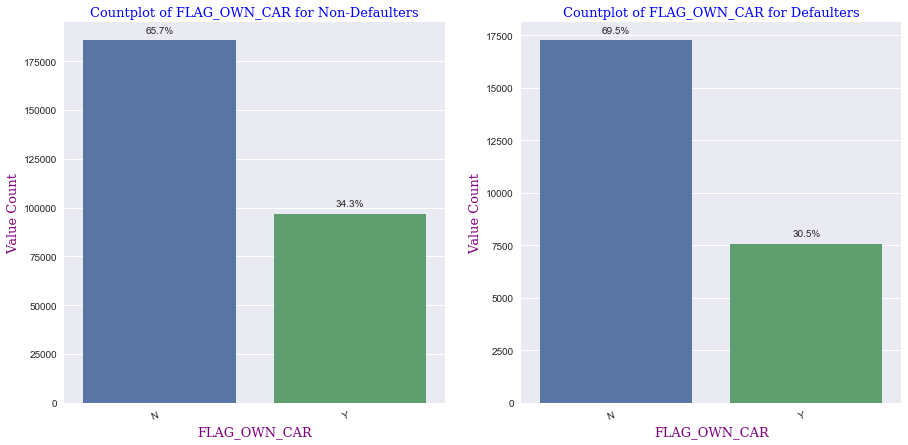

In [114]:
uni_categorical('FLAG_OWN_CAR')

#### INSIGHTS -: 
*  There are less people who don't own a car and have defaulted previously, but then again that's also the case with non-defaulters.

### 2.2.1.2 NAME_INCOME_TYPE

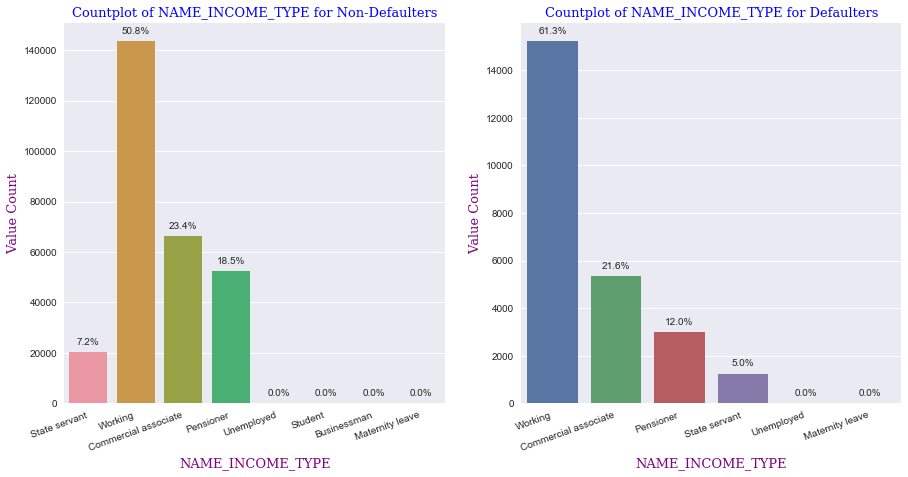

In [115]:
uni_categorical('NAME_INCOME_TYPE')

#### INSIGHTS -:
* We can clearly see in the Defaulters plot that nearly 61.3% people who have defaulted on a previous ocassion have their income type as working.
* But then if we see the Non-Defaulters plot we again see a similar kind of trend nearly 50% of the people who have not defaulted also belong to the working category.

### 2.2.1.3 NAME_HOUSING_TYPE

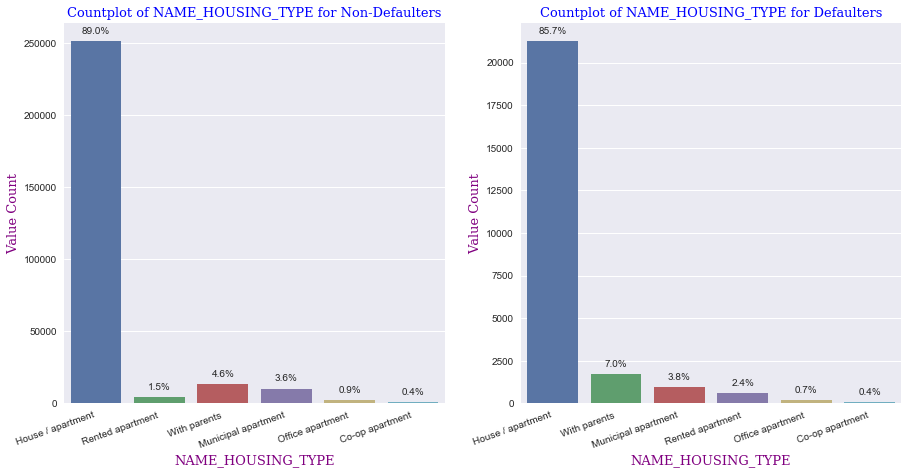

In [116]:
uni_categorical('NAME_HOUSING_TYPE')

#### INSIGHTS -:
* This plot is pretty insightful
* First of, we can see in both the cases, that the majority of people from both Defaulters and Non-Defaulters live in a house or an apartment.
* This could be a very important factor while making a decision on a client's approval.

### 2.2.1.4 NAME_FAMILY_STATUS

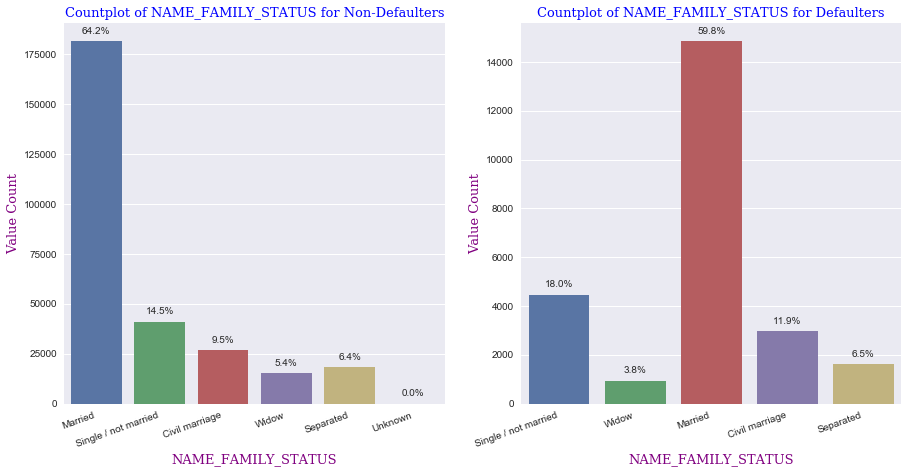

In [117]:
uni_categorical('NAME_FAMILY_STATUS')

#### INSIGHTS -:
* Mostly married people tend to go for loans, which means more of them also tend to default, there could be many reasons to this.
* Maybe because of their additional needs married people take loans and sometimes also default on the laon payments.

### 2.2.1.5 CODE_GENDER

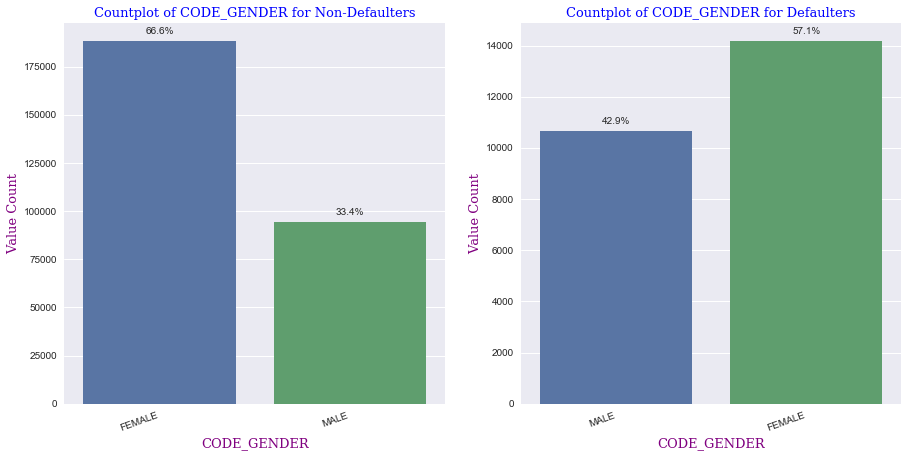

In [118]:
uni_categorical('CODE_GENDER')

#### INSIGHTS-:
* In the non defaulter plot there are 66.6% Females which is almost double the number of Males.
* In the defaulter plot, 57.1% Females contribute to the overall count, here it is not as significant as it was in the non defaulter plot.
* From all of the observations, we conclude that there are more female clients opting for loans which in turn means that there will be more female defaulters and non-defaulters.

### 2.2.1.6 AGE_BUCKET

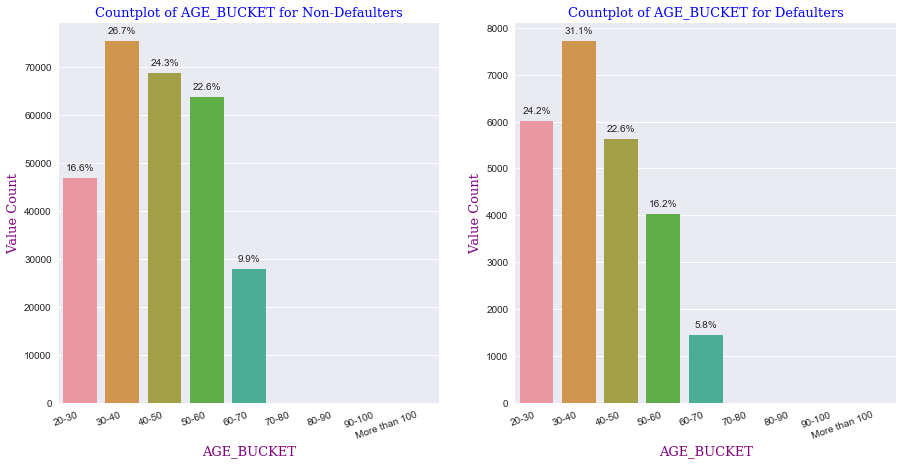

In [119]:
uni_categorical('AGE_BUCKET')

#### INSIGHTS -:
* 

### 2.2.2 Continuous univariate analysis

#### Now let's do some univariate analysis on continuous variables.

### 2.2.2.1 YEARS_EMPLOYED

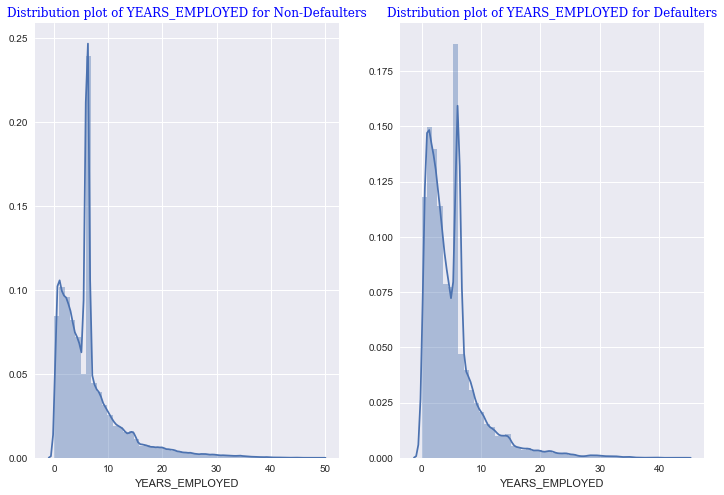

In [120]:
fig,(ax1, ax2) = plt.subplots(1,2,figsize = [12,8])

sns.distplot(a_data_non_default.YEARS_EMPLOYED, ax = ax1)
ax1.set_title('Distribution plot of YEARS_EMPLOYED for Non-Defaulters',fontdict = title_font, fontsize = 12)

sns.distplot(a_data_default.YEARS_EMPLOYED, ax = ax2)
ax2.set_title('Distribution plot of YEARS_EMPLOYED for Defaulters', fontdict = title_font, fontsize = 12)

plt.show()

#### INSIGHTS -:
* In both the case we see a sharp spike at 5-7 years and then a sudden decline.
* In the Defaulters plot we can clearly see that majority of the clients were employed for around 10 years at the time of the application.

### 2.2.2.2 CNT_FAM_MEMBERS

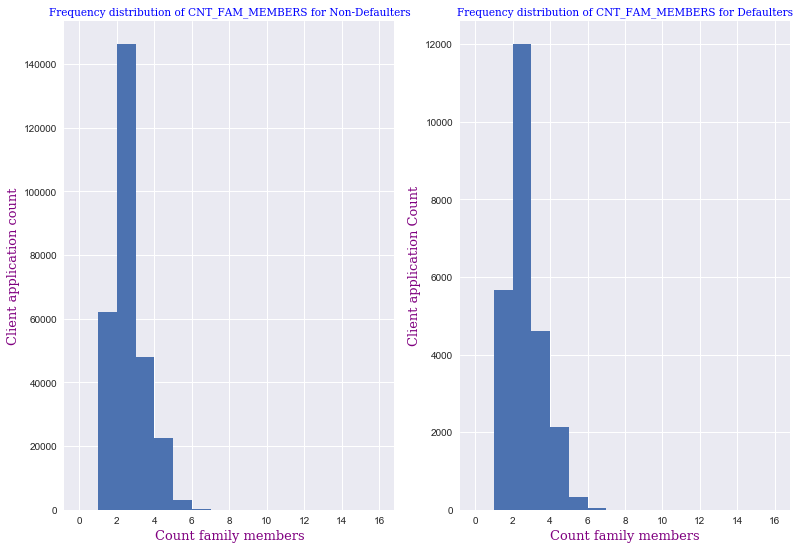

In [121]:
plt.figure(figsize = [13,9])

plt.subplot(1,2,1)
plt.hist(a_data_non_default.CNT_FAM_MEMBERS, bins = range(17))
plt.title('Frequency distribution of CNT_FAM_MEMBERS for Non-Defaulters', fontdict = title_font, fontsize = 10.5)
plt.xlabel('Count family members', fontdict = label_font)
plt.ylabel('Client application count', fontdict = label_font)

plt.subplot(1,2,2)
plt.hist(a_data_default.CNT_FAM_MEMBERS, bins = range(17))
plt.title('Frequency distribution of CNT_FAM_MEMBERS for Defaulters', fontdict = title_font, fontsize = 10.5)
plt.xlabel('Count family members', fontdict = label_font)
plt.ylabel('Client application Count', fontdict = label_font)

plt.show()

#### INSGHTS -:
* Clients with family members between 2-4 are more susceptible of taking loans
* That also results in more clients from that particular group in defaulting on loan payments.

### Now before moving to Bivariate analysis let's see the correlation between some of the variables.

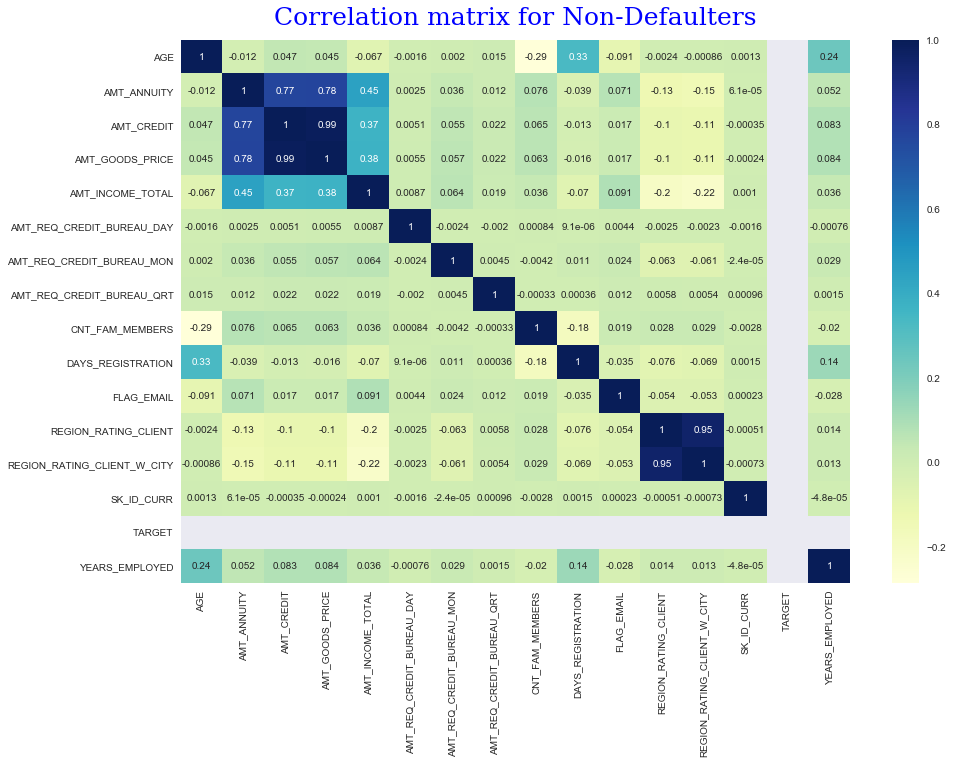

In [122]:
#Correlation matrix for Non-Defaulters
non_default_corr = a_data_non_default.corr()

plt.figure(figsize = [15,10])

sns.heatmap(non_default_corr,cmap = 'YlGnBu', annot = True)
plt.title('Correlation matrix for Non-Defaulters', fontdict = title_font, pad = 15, fontsize = 25)
plt.show()

### NOTE - Target is a categorical variable so just ignore all the grey bars.

#### Observations -:
*obviously we can see that there are some variables that have a significantly greater coefficient of correlation.*

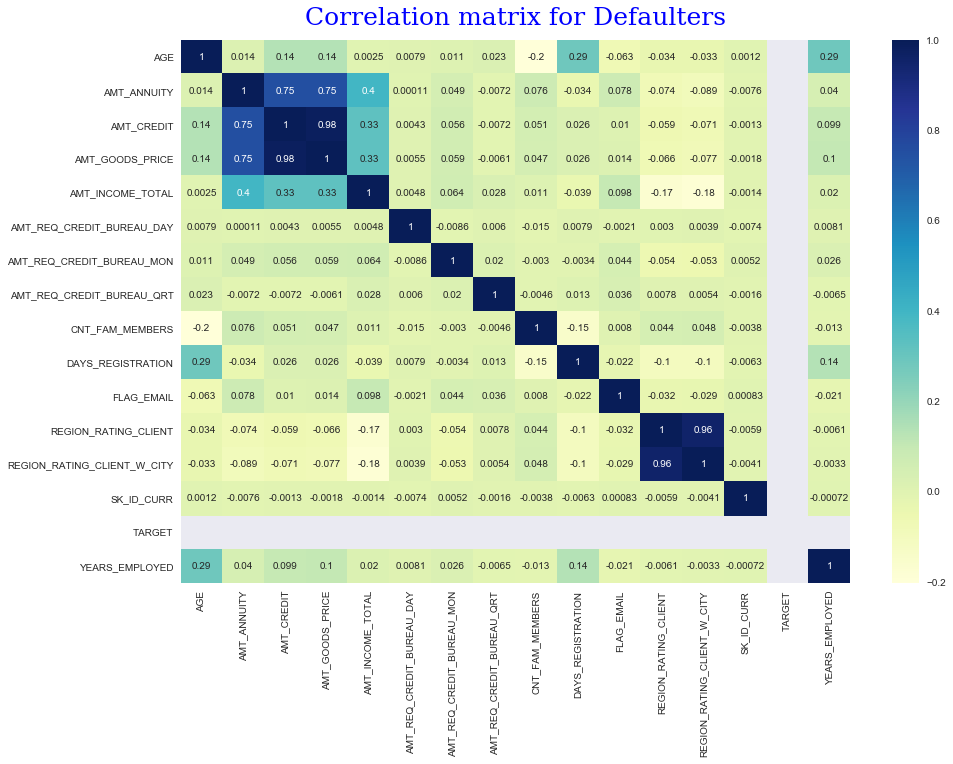

In [123]:
#Correlation matrix for Defalters
default_corr = a_data_default.corr()

plt.figure(figsize = [15,10])
sns.heatmap(default_corr, cmap = 'YlGnBu', annot = True)
plt.title('Correlation matrix for Defaulters', fontdict = title_font, pad = 15, fontsize = 25)
plt.show()

#### Observations -:
*Looks fairly similar to the previous correlation matrix.*

## 2.3 BIVARIATE ANALYSIS - Now its time to plot two variable plot to see their relation.

### 2.3.1 PAIRPLOT - Let's first plot some of the varialbles with a high coefficient of correlation using a pairplot

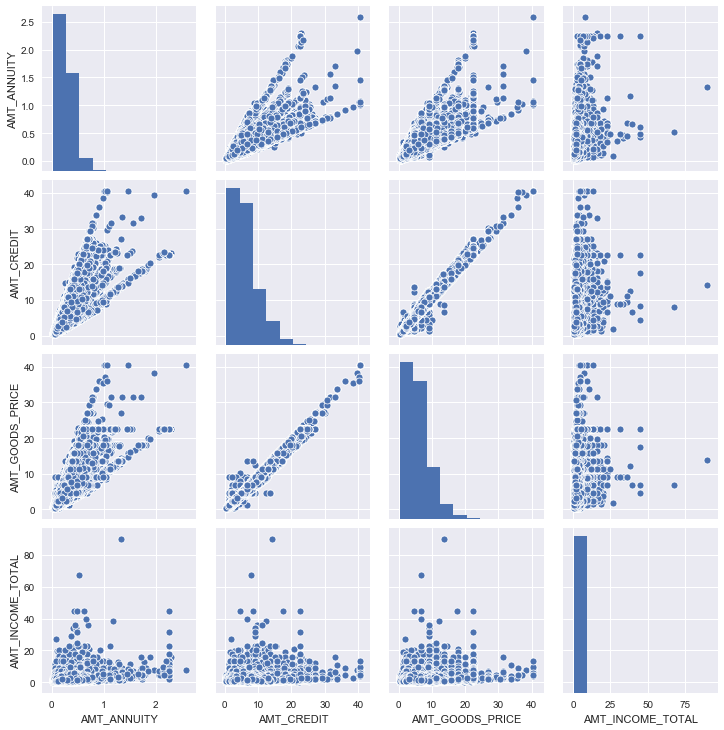

In [124]:
#Since this is just to get an idea of what we are dealing with, we are using the main dataframe instead of the two(defaulter and non-defaulter) dataframes.
sns.pairplot(a_data_main[['AMT_ANNUITY','AMT_CREDIT','AMT_GOODS_PRICE','AMT_INCOME_TOTAL']], kind = 'scatter')
plt.show()

#### Now that we have an eagle eye view of all these variables, let's check them seperately to get some insights out of them.

### Let's now create function that can seperately plot these variables for Defaulters and Non-Defaulters.

In [125]:
def bivariate(x,y):
    plt.figure(figsize = [15,10])
    
    #Non-Default
    plt.subplot(1,2,1)
    plt.scatter(a_data_non_default[x],a_data_non_default[y],alpha = 0.7)
    plt.xlabel(x, fontdict = label_font)
    plt.ylabel(y, fontdict = label_font)
    plt.title('{0} vs. {1} for Non-Defaulters'.format(x,y), fontdict = title_font, pad = 15)
    
    #Default
    plt.subplot(1,2,2)
    plt.scatter(a_data_default[x],a_data_default[y],alpha = 0.7)
    plt.xlabel(x, fontdict = label_font)
    plt.ylabel(y, fontdict = label_font)
    plt.title('{0} vs. {1} for Defaulters'.format(x,y), fontdict = title_font, pad = 15)
    

### 2.3.2 AMT_CREDIT vs. AMT_ANNUITY

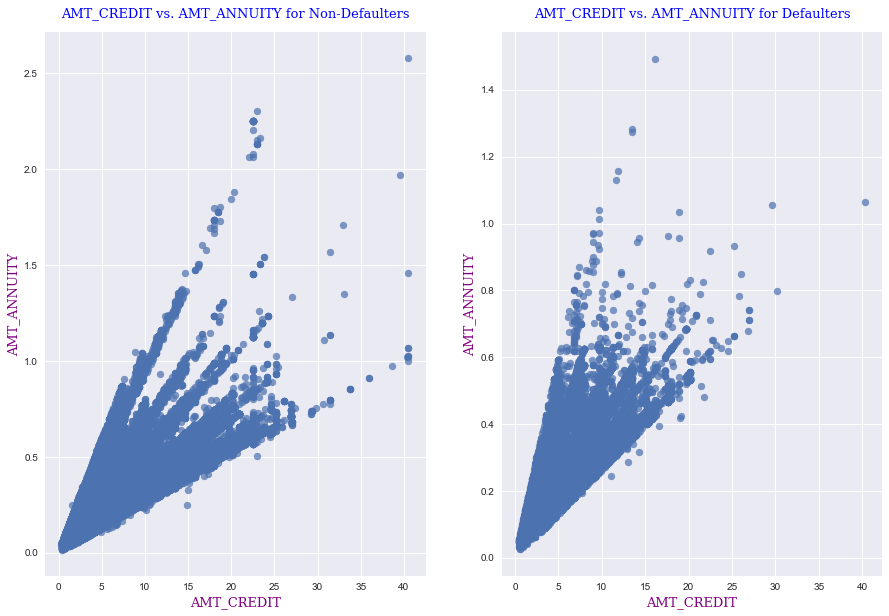

In [126]:
bivariate('AMT_CREDIT','AMT_ANNUITY')

#### Observations -:
* We can see the difference between the two plots, here in the defaulters plot the loan annuity tends to increase faster even when the credit amount is low, where as we see a linear relationship between the two variables in the non-defaulters plot

### 2.3.3 AMT_CREDIT vs. AMT_INCOME_TOTAL

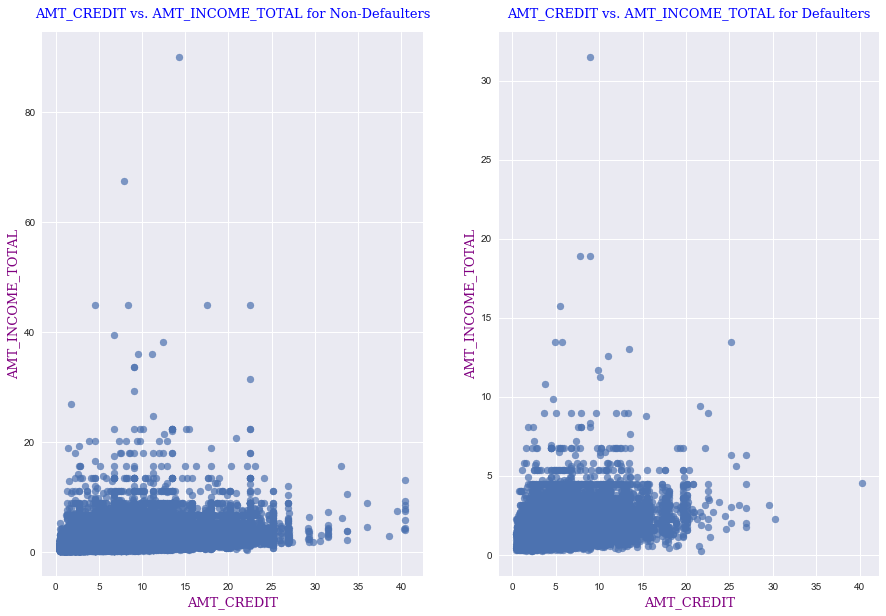

In [127]:
bivariate('AMT_CREDIT','AMT_INCOME_TOTAL')

#### Observations -:
* In the non-defaulters clients with lower total income are more inclined towards taking higher amount credit loans.
* In the defaulters section, we also see the same kind of trend but at one point the credit amount sees a decline unlike the non-defaulters.

#### Some other variables also look very interesting like CNT_FAM_MEMBERS, we can plot the CNT_FAM_MEMBERS with the AMT_INCOME_TOTAL to see if it provides some kind of useful information or not.

### 2.3.4 CNT_FAM_MEMBERS vs. AMT_INCOME_TOTAL

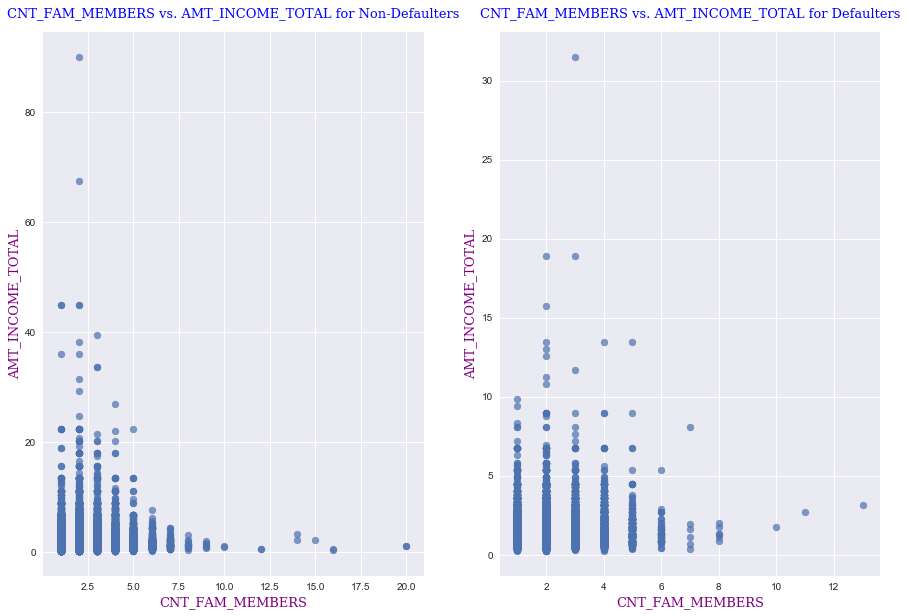

In [128]:
bivariate('CNT_FAM_MEMBERS','AMT_INCOME_TOTAL')

#### Observations -:
* The general trend tells us that clients with 2-3 family members are more likely to apply and also default.
* But that in itself is not a reason to conclude that it is a driving factor in loan defaults, maybe combining with some extra information might increase its credibility.

### 2.3.5 AGE vs. AMT_CREDIT

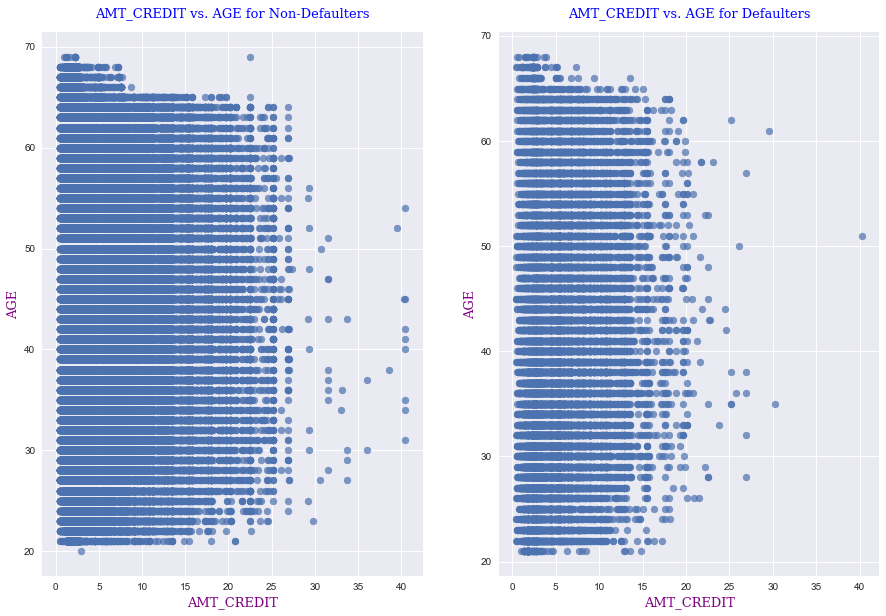

In [129]:
bivariate('AMT_CREDIT','AGE')

#### Observations -:
* Defaulters in genral tend to take less credit amount of loan than non defaulter in any agee group.

In [130]:
def multi_var_plots(x,y,df,hue,figsize,labels):
    
    plt.figure(figsize=figsize)
    sns.barplot(x=x,y=y,data=df, hue=hue)     
        
    plt.xlabel(x,fontdict = label_font)    
    plt.ylabel(y,fontdict = label_font)    
    plt.title('{0} vs. {1} on {2}'.format(x,y,hue),fontdict = title_font) 
    plt.xticks(rotation=45, ha='right')
    plt.legend(labels = labels )
    plt.show()

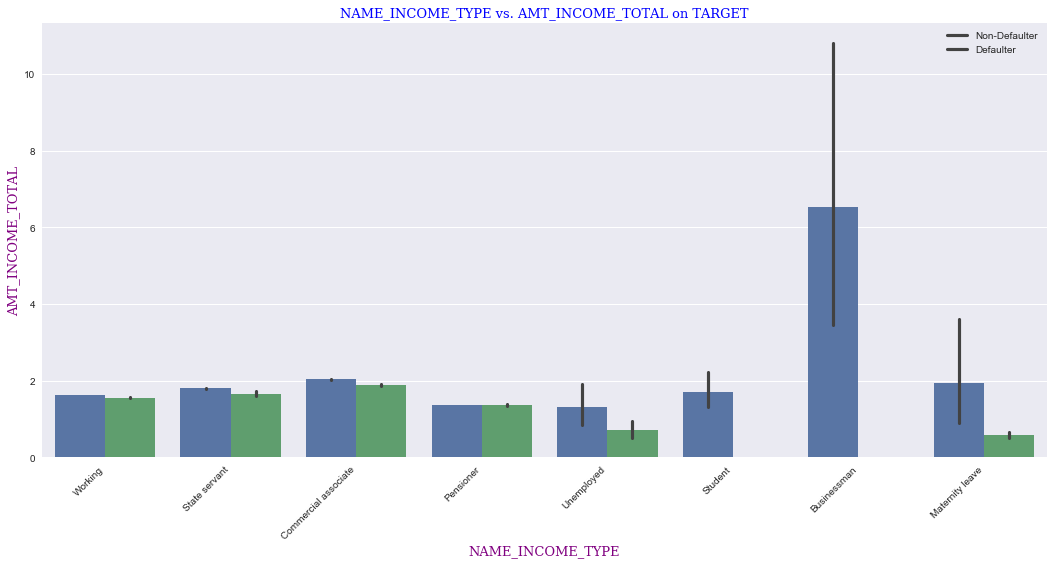

In [131]:
multi_var_plots("NAME_INCOME_TYPE","AMT_INCOME_TOTAL",a_data_main,"TARGET",(18,8),['Non-Defaulter','Defaulter'])

#### Observations -:
* It can be seen that Businessman income is the highest among all the other income types and we also know that businessmen and students have a very negligible history of defaulting on loan payments according to this dataset.

# -----------------------------------------------------------------------------------------------------------------

# *------------- Let's now get started with the previous application dataset -------------*

# -----------------------------------------------------------------------------------------------------------------

## Understanding dataset 2 (prev_data)

In [132]:
#RESET POINT - for easier accessibility.

#prev_data = pd.read_csv('previous_application.csv')

In [133]:
#Checking the number of rows and columns of prev_data.
prev_data.shape

(1670214, 37)

#### This dataset has nearly 17,00,000 records and 37 columns.

In [134]:
#Let's see the information of all the columns in the prev_data dataset.
prev_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [135]:
#Checking the first 5 records of prev_data.
prev_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [136]:
#Getting a look at the summary of all the numerical columns in prev_data.
prev_data.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,...,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,...,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,...,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,...,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,...,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,...,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,...,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,...,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,...,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


### Initial observations of the "application_data" dataset
* **As mentioned previously there is a huge number of records in this dataset (nearly 17,00,000), also it has 37 columns.** 
* **Again, we see in some of the "DAYS" columns there are negative numeric values, at this point we are just assuming that these are data entry errors but before making them positive, we might need to confirm if these values are supposed to be negative or if it is really a data entry error.** 


# Part 1 - Data cleaning and manipulation(prev_data)

### NOTE -: We are going to use the letter p as a prefix to reuse some of the variables that we used in the a_data dataset cleaning, just to avoid any kind of confusion.

## P 1.1 - Dealing with null values in prev_data.

In [137]:
#Checking null values in each column
prev_data.isnull().sum().sort_values(ascending = False)

RATE_INTEREST_PRIVILEGED       1664263
RATE_INTEREST_PRIMARY          1664263
RATE_DOWN_PAYMENT               895844
AMT_DOWN_PAYMENT                895844
NAME_TYPE_SUITE                 820405
DAYS_TERMINATION                673065
NFLAG_INSURED_ON_APPROVAL       673065
DAYS_FIRST_DRAWING              673065
DAYS_FIRST_DUE                  673065
DAYS_LAST_DUE_1ST_VERSION       673065
DAYS_LAST_DUE                   673065
AMT_GOODS_PRICE                 385515
AMT_ANNUITY                     372235
CNT_PAYMENT                     372230
PRODUCT_COMBINATION                346
AMT_CREDIT                           1
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
AMT_APPLICATION                      0
NAME_PAYMENT_TYPE                    0
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS     

#### From the first glance we can clearly see that the 'RATE_INTEREST' columns have more than 95% of their values as null.

In [138]:
#Checking the percentage of null values in each column
prev_data.isnull().sum().sort_values(ascending = False)/prev_data.shape[0]*100

RATE_INTEREST_PRIVILEGED       99.643698
RATE_INTEREST_PRIMARY          99.643698
RATE_DOWN_PAYMENT              53.636480
AMT_DOWN_PAYMENT               53.636480
NAME_TYPE_SUITE                49.119754
DAYS_TERMINATION               40.298129
NFLAG_INSURED_ON_APPROVAL      40.298129
DAYS_FIRST_DRAWING             40.298129
DAYS_FIRST_DUE                 40.298129
DAYS_LAST_DUE_1ST_VERSION      40.298129
DAYS_LAST_DUE                  40.298129
AMT_GOODS_PRICE                23.081773
AMT_ANNUITY                    22.286665
CNT_PAYMENT                    22.286366
PRODUCT_COMBINATION             0.020716
AMT_CREDIT                      0.000060
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
AMT_APPLICATION                 0.000000
NAME_PAYMENT_TYPE               0.000000
NAME_CASH_LOAN_P

### Let's use the same criteria that we used with the "a_data" dataset, i.e. let's remove the columns with more than 45% of their values as null values.

#### We are going to reuse the function that we created to check null percentage in a_data, and store the columns with more than 45% of their values as null.

In [139]:
#Just for user reference, the function is mentioned as a comment in the lower part of this cell

# def check_null_perc(df):
#     null_perc = round(df.isnull().sum().sort_values(ascending = False)/df.shape[0]*100,2)
#     return null_perc

# #Creating a reusable function to check the null value count of each column of a dataset.
# def check_null_values(df):
#     null_val = df.isnull().sum().sort_values(ascending = False)
#     return null_val

#### This time let's get rid of all the columns with more than 50% null values as NAME_TYPE_SUITE is also in there and we used that column in the previous dataset, so it might help in here as well.

In [140]:
#Storing all the columns with atleast 45% null values in a new variable.
p_null_perc_50_cols = check_null_perc(prev_data)[check_null_perc(prev_data) > 50]
p_null_perc_50_cols

RATE_INTEREST_PRIVILEGED    99.64
RATE_INTEREST_PRIMARY       99.64
RATE_DOWN_PAYMENT           53.64
AMT_DOWN_PAYMENT            53.64
dtype: float64

#### There are just 4 columns that have more than 50% null value count.

In [141]:
#Dropping all the 4 columns that have more than 50% null values.
#RUN ONLY ONCE
prev_data.drop(p_null_perc_50_cols.index,axis = 1, inplace = True)

In [142]:
prev_data.shape

(1670214, 33)

In [143]:
#Checking the number of remaining columns with null values.
len(check_null_values(prev_data)[check_null_perc(prev_data) > 0])

11

#### Now we are left with 11 columns with null values.

### P 1.1.1 Let's do the same thing with the NAME_TYPE_SUITE column that we did in the a_data dataframe.

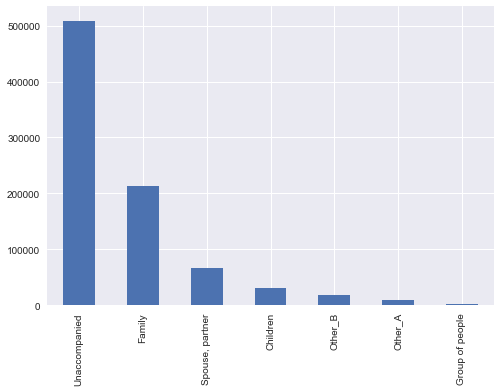

In [144]:
#Let's first check all the cateogories in this column.
prev_data.NAME_TYPE_SUITE.value_counts().plot.bar()
plt.show()

#### Although, the category 'UNACCOMPANIED' has more than double the count of the next category, we can't use it to impute the null values as literally half of the values are null (49%) so let's create a new descriptive category like we created for the name_type_suite column in a_data.

In [145]:
prev_data.NAME_TYPE_SUITE = prev_data.NAME_TYPE_SUITE.fillna('UNKNOWN')

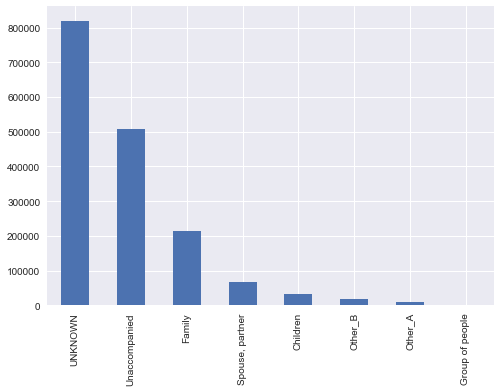

In [146]:
prev_data.NAME_TYPE_SUITE.value_counts().plot.bar()
plt.show()

#### Now as we know Unknown is a category is created by us, there is no way it can affect our analysis in unwanted ways.

### P 1.1.2 Dealing with the remaining columns with null values.

In [147]:
#Since there is just a handful of columns remaining with null values, let's check them.
check_null_perc(prev_data)[check_null_perc(prev_data)>0]

NFLAG_INSURED_ON_APPROVAL    40.30
DAYS_LAST_DUE                40.30
DAYS_LAST_DUE_1ST_VERSION    40.30
DAYS_FIRST_DUE               40.30
DAYS_FIRST_DRAWING           40.30
DAYS_TERMINATION             40.30
AMT_GOODS_PRICE              23.08
AMT_ANNUITY                  22.29
CNT_PAYMENT                  22.29
PRODUCT_COMBINATION           0.02
dtype: float64

#### Observation -:
* So, we have 6 columns with exactly the same percentage of null values and out of those 6, 5 columns are "DAYS" columns.
* As we had already noticed that there were negative values in the "DAYS" columns, we can't just impute the null values in those columns without first understanding and fixing the negative values in them.

In [148]:
#Let's first check all the 'DAYS' columns in the prev_data dataset.
p_days_cols = [x for x in prev_data if 'DAYS' in x]
p_days_cols

['DAYS_DECISION',
 'DAYS_FIRST_DRAWING',
 'DAYS_FIRST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_LAST_DUE',
 'DAYS_TERMINATION']

In [149]:
prev_data[p_days_cols].describe()

,DAYS_DECISION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION
count,1.670214e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,-8.806797e+02,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838
std,7.790997e+02,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729
min,-2.922000e+03,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000
25%,-1.300000e+03,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000
50%,-5.810000e+02,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000
75%,-2.800000e+02,365243.000000,-411.000000,129.000000,-74.000000,-44.000000
max,-1.000000e+00,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000


#### By checking into their descriptions, we can conclude that the negative values can be converted as they do not serve any purpose.

In [150]:
#Converting the negative values into positive.
prev_data[p_days_cols] = prev_data[p_days_cols].abs()

In [151]:
prev_data[p_days_cols].describe()

,DAYS_DECISION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION
count,1.670214e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,8.806797e+02,342340.056543,15949.224065,35163.363265,78152.730207,83505.775017
std,7.790997e+02,88413.495220,72007.270877,106405.950190,148833.342466,152484.418802
min,1.000000e+00,2.000000,2.000000,0.000000,2.000000,2.000000
25%,2.800000e+02,365243.000000,475.000000,257.000000,455.000000,447.000000
50%,5.810000e+02,365243.000000,921.000000,741.000000,1155.000000,1171.000000
75%,1.300000e+03,365243.000000,1825.000000,1735.000000,2418.000000,2501.000000
max,2.922000e+03,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000


### Observations -:
* Clearly there is something wrong about the "DAYS" columns except the DAYS_DECISION column.
* The maximum values are first of all too high and also they are all same for these 5 columns "DAYS_FIRST_DRAWING, DAYS_FIRST_DUE, DAYS_LAST_DUE_1ST_VERSION, DAYS_LAST_DUE, DAYS_TERMINATION".

### We have decided to drop these columns, the argument being that fixing these columns would result in a lot of assumptions which might lead to false analysis, so rather than making bare assumptions and mislead our analysis into oblivion, we are dropping these columns and only keeping the "DAYS_DECISION" column.
### Although these columns might have been useful if they had correct logical values, right now these columns are almost useless for us.

In [152]:
#Storing all the DAYS columns except the DAYS_DECISION column in p_days_cols variable.
p_days_cols = [x for x in p_days_cols if "DAYS_DECISION" not in x]
p_days_cols

['DAYS_FIRST_DRAWING',
 'DAYS_FIRST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_LAST_DUE',
 'DAYS_TERMINATION']

In [153]:
#Deleting the unnecessary columns from prev_data.
#RUN ONLY ONCE.
prev_data.drop(p_days_cols, axis = 1, inplace = True)

In [154]:
#Checking
prev_data.shape

(1670214, 28)

### P 1.1.3 The next columns to be checked in the list are AMT_GOODS_PRICE and AMT_ANNUITY.

In [155]:
#let's see the numeric values in the two "AMT" columns
prev_data[['AMT_GOODS_PRICE','AMT_ANNUITY']].describe()

,AMT_GOODS_PRICE,AMT_ANNUITY
count,1.284699e+06,1.297979e+06
mean,2.278473e+05,1.595512e+04
std,3.153966e+05,1.478214e+04
min,0.000000e+00,0.000000e+00
25%,5.084100e+04,6.321780e+03
50%,1.123200e+05,1.125000e+04
75%,2.340000e+05,2.065842e+04
max,6.905160e+06,4.180581e+05


#### The values in these two columns don't seem peculiar in any way but still we can check what is the spread using boxplots.

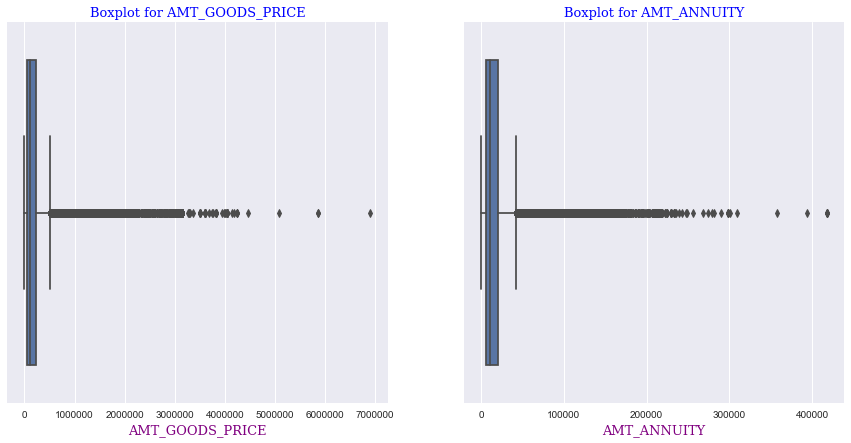

In [156]:
plt.figure(figsize = [15,7])

plt.subplot(1,2,1)
sns.boxplot(prev_data.AMT_GOODS_PRICE)
plt.title('Boxplot for AMT_GOODS_PRICE', fontdict = title_font)
plt.xlabel('AMT_GOODS_PRICE',fontdict = label_font)

plt.subplot(1,2,2)
sns.boxplot(prev_data.AMT_ANNUITY)
plt.title('Boxplot for AMT_ANNUITY', fontdict = title_font)
plt.xlabel('AMT_ANNUITY',fontdict = label_font)

plt.show()

### Observations -:
* The outer values look like outliers but as we know what these columns are about we can conclude that these are just regular values.
* We have two options now 
    * 1. We can impute the null values with the median.
    * 2. We can impute some of the higher values and the null values with the median.

#### We are going with the first approach so as to preserve the integrity of the values.

In [157]:
#Imputing null values with the median value.
prev_data.AMT_GOODS_PRICE = prev_data.AMT_GOODS_PRICE.fillna(prev_data.AMT_GOODS_PRICE.median())
prev_data.AMT_ANNUITY = prev_data.AMT_ANNUITY.fillna(prev_data.AMT_ANNUITY.median())

In [158]:
#Checking results
print('Null values remaining in AMT_GOODS_PRICE =',prev_data.AMT_GOODS_PRICE.isnull().sum())
print('Null values remaining in AMT_ANNUITY =',prev_data.AMT_ANNUITY.isnull().sum())

Null values remaining in AMT_GOODS_PRICE = 0
Null values remaining in AMT_ANNUITY = 0


### Let's check how many columns we are left with, with null values.

In [159]:
check_null_perc(prev_data)

NFLAG_INSURED_ON_APPROVAL      40.30
CNT_PAYMENT                    22.29
PRODUCT_COMBINATION             0.02
AMT_CREDIT                      0.00
NAME_CONTRACT_STATUS            0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_ANNUITY                     0.00
AMT_APPLICATION                 0.00
AMT_GOODS_PRICE                 0.00
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
NAME_CASH_LOAN_PURPOSE          0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_TYPE_SUITE                 0.00
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
NAME_SELLER_INDUSTRY            0.00
NAME_YIELD_GROUP                0.00
S

### P 1.1.4 Let's now check the NFLAG_INSURED_ON_APPROVAL and CNT_PAYMENT columns.

In [160]:
prev_data.NFLAG_INSURED_ON_APPROVAL.head()

0    0.0
1    1.0
2    1.0
3    1.0
4    NaN
Name: NFLAG_INSURED_ON_APPROVAL, dtype: float64

In [161]:
prev_data[['NFLAG_INSURED_ON_APPROVAL','CNT_PAYMENT']].describe()

,NFLAG_INSURED_ON_APPROVAL,CNT_PAYMENT
count,997149.000000,1.297984e+06
mean,0.332570,1.605408e+01
std,0.471134,1.456729e+01
min,0.000000,0.000000e+00
25%,0.000000,6.000000e+00
50%,0.000000,1.200000e+01
75%,1.000000,2.400000e+01
max,1.000000,8.400000e+01


#### Observation -:
* NFLAG_INSURED_ON_APPROVAL is a categorical column so we can create a new category as N/A(not available or not applicable) and replace the null values with that.
* CNT_PAYMENT doesn't show any signs of strange values but still to be double sure we check it once again with a plot.

In [162]:
#Replacing the null values in NFLAG_INSURED_ON_APPROVAL with 'N/A'
prev_data.NFLAG_INSURED_ON_APPROVAL = prev_data.NFLAG_INSURED_ON_APPROVAL.fillna('N/A')

In [163]:
print('Null values remaining in NFLAG_INSURED_ON_APPROVAL =',prev_data.NFLAG_INSURED_ON_APPROVAL.isnull().sum())

Null values remaining in NFLAG_INSURED_ON_APPROVAL = 0


#### Let's move to CNT_PAYMENT column.

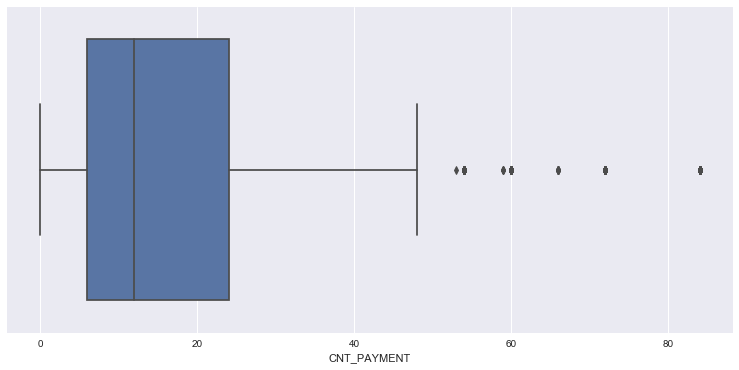

In [164]:
#Let's use a boxplot to see if there is anything weird going on with the values in this column or not.
plt.figure(figsize = [13,6])
sns.boxplot(prev_data.CNT_PAYMENT)

#### Observations -:
* There are outliers but again those values don't seem like error they are more of a natural extreme values.
* Let's impute the null values with the median value just to be on the safer side.

In [165]:
#Imputing the null values with the median value.
prev_data.CNT_PAYMENT = prev_data.CNT_PAYMENT.fillna(prev_data.CNT_PAYMENT.median())

In [166]:
print('Null values remaining in CNT_PAYMENT =',prev_data.CNT_PAYMENT.isnull().sum())

Null values remaining in CNT_PAYMENT = 0


### P 1.1.5 Now let's deal with the last few columns with null values.

In [167]:
check_null_values(prev_data)[check_null_values(prev_data) > 0]

PRODUCT_COMBINATION    346
AMT_CREDIT               1
dtype: int64

In [168]:
#Let's check the values in PRODUCT_COMBINATION column.
prev_data.PRODUCT_COMBINATION.value_counts()

Cash                              285990
POS household with interest       263622
POS mobile with interest          220670
Cash X-Sell: middle               143883
Cash X-Sell: low                  130248
Card Street                       112582
POS industry with interest         98833
POS household without interest     82908
Card X-Sell                        80582
Cash Street: high                  59639
Cash X-Sell: high                  59301
Cash Street: middle                34658
Cash Street: low                   33834
POS mobile without interest        24082
POS other with interest            23879
POS industry without interest      12602
POS others without interest         2555
Name: PRODUCT_COMBINATION, dtype: int64

#### Observation -:
* The most frequent value does not have a very big difference from the second most frequent value. 
* But the missing values are very little so let's just impute them with the mode value.

In [169]:
prev_data.PRODUCT_COMBINATION = prev_data.PRODUCT_COMBINATION.fillna(prev_data.PRODUCT_COMBINATION.mode()[0])

In [170]:
#Checking
prev_data.PRODUCT_COMBINATION.value_counts().head(1)

Cash    286336
Name: PRODUCT_COMBINATION, dtype: int64

### Moving on to the AMT_CREDIT column.

In [171]:
#Let's check the values.
prev_data.AMT_CREDIT.describe()

count    1.670213e+06
mean     1.961140e+05
std      3.185746e+05
min      0.000000e+00
25%      2.416050e+04
50%      8.054100e+04
75%      2.164185e+05
max      6.905160e+06
Name: AMT_CREDIT, dtype: float64

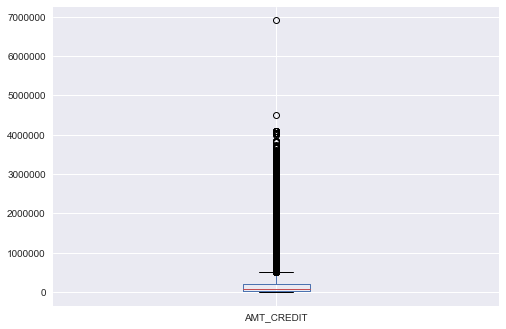

In [172]:
prev_data.AMT_CREDIT.plot.box()
plt.show()

#### Let's use the IQR method to detect outliers and fix them as it is pretty obvious that this column is filled with outliers.

In [173]:
#IQR method to find outliers
Q1 = prev_data.AMT_CREDIT.quantile(0.25)
Q3 = prev_data.AMT_CREDIT.quantile(0.75)

IQR = Q3 - Q1
IQR

192258.0

In [174]:
#Let's calculate the upper bound and lower bound for AMT_CREDIT.
upper_bound = Q3 + (1.5 * IQR)
lower_bound = Q1 + (1.5 * IQR)

print('Upper bound for AMT_CREDIT =',upper_bound)
print('Lower bound for AMT_CREDIT =',lower_bound)

Upper bound for AMT_CREDIT = 504805.5
Lower bound for AMT_CREDIT = 312547.5


In [175]:
prev_data = prev_data[~(prev_data.AMT_CREDIT > upper_bound)]

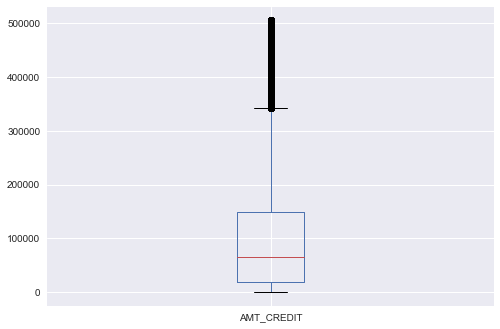

In [176]:
prev_data.AMT_CREDIT.plot.box()
plt.show()

In [177]:
#Imputing the null value(1) with the mean.
prev_data.AMT_CREDIT = prev_data.AMT_CREDIT.fillna(prev_data.AMT_CREDIT.mean())

In [178]:
print('Null values remaining in AMT_CREDIT =',prev_data.AMT_CREDIT.isnull().sum())

Null values remaining in AMT_CREDIT = 0


# Part 2 - Data standardization(prev_data)

In [179]:
prev_data.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT
count,1.490225e+06,1.490225e+06,1.490225e+06,1.490225e+06,1.490225e+06,1.490225e+06,1.490225e+06,1.490225e+06,1.490225e+06,1.490225e+06,1.490225e+06
mean,1.921850e+06,2.783301e+05,1.176938e+04,9.342870e+04,1.043948e+05,1.220936e+05,1.251630e+01,9.967824e-01,9.231571e+02,3.449130e+02,1.231847e+01
std,5.327648e+05,1.028144e+05,7.668200e+03,1.067930e+05,1.167150e+05,9.191766e+04,3.336328e+00,5.663289e-02,8.056985e+02,7.528680e+03,8.520504e+00
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,-1.000000e+00,0.000000e+00
25%,1.460450e+06,1.893170e+05,6.842160e+03,0.000000e+00,1.885500e+04,5.949090e+04,1.000000e+01,1.000000e+00,2.830000e+02,-1.000000e+00,8.000000e+00
50%,1.921337e+06,2.786190e+05,1.125000e+04,5.845500e+04,6.474150e+04,1.123200e+05,1.200000e+01,1.000000e+00,6.090000e+02,1.500000e+01,1.200000e+01
75%,2.383233e+06,3.674520e+05,1.320282e+04,1.350000e+05,1.483650e+05,1.350000e+05,1.500000e+01,1.000000e+00,1.429000e+03,1.000000e+02,1.200000e+01
max,2.845382e+06,4.562550e+05,1.309905e+05,3.510000e+06,5.048055e+05,3.510000e+06,2.300000e+01,1.000000e+00,2.922000e+03,4.000000e+06,8.400000e+01


### P 2.1 Let's convert DAYS_DECISION into YEARS_DECISION and get rid of DAYS_DECISION.

In [180]:
prev_data['YEARS_DECISION'] = prev_data.DAYS_DECISION.apply(lambda x: round(x/365,1))
prev_data.YEARS_DECISION.head()

0    0.2
2    0.8
3    1.4
4    2.1
5    1.9
Name: YEARS_DECISION, dtype: float64

# ----------------------------------------------------------------------------------------------------------------

# *--------------------------------- Merging the two dataframes  -------------------------------------*

# ----------------------------------------------------------------------------------------------------------------

## Now it's time to merge two dataframes together to see the realtion between the variables from both the sides.

In [181]:
#Creating a new dataframe to merge the two dataframes.
merged_data = pd.merge(a_data_main, prev_data, how='left', on='SK_ID_CURR')
merged_data.head()

,AGE,AMT_ANNUITY_x,AMT_ANNUITY_BUCKET,AMT_CREDIT_x,AMT_CREDIT_BUCKET,AMT_GOODS_PRICE_x,AMT_GOODS_PRICE_BUCKET,AMT_INCOME_TOTAL,AMT_INCOME_TOTAL_BUCKET,AMT_REQ_CREDIT_BUREAU_DAY,...,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,NFLAG_INSURED_ON_APPROVAL,YEARS_DECISION
0,25,0.247,0-1L,4.066,4L-5L,3.510,3L-4L,2.025,2L-3L,0.0,...,POS,XNA,Stone,500.0,Auto technology,24.0,low_normal,POS other with interest,0,1.7
1,45,0.357,0-1L,12.935,More than 10L,11.295,More than 10L,2.700,2L-3L,0.0,...,POS,XNA,Stone,1400.0,Furniture,6.0,middle,POS industry with interest,0,2.3
2,45,0.357,0-1L,12.935,More than 10L,11.295,More than 10L,2.700,2L-3L,0.0,...,POS,XNA,Country-wide,200.0,Consumer electronics,12.0,middle,POS household with interest,1,6.4
3,52,0.068,0-1L,1.350,1L-2L,1.350,1L-2L,0.675,0-1L,0.0,...,POS,XNA,Regional / Local,30.0,Connectivity,4.0,middle,POS mobile without interest,0,2.2
4,52,0.297,0-1L,3.127,3L-4L,2.970,2L-3L,1.350,1L-2L,0.0,...,XNA,XNA,Credit and cash offices,-1.0,XNA,12.0,XNA,Card Street,N/A,0.5


In [182]:
#Let's check the shape of the merged dataframe
merged_data.shape

(1279869, 59)

In [183]:
#Checking the information of all columns.
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1279869 entries, 0 to 1279868
Data columns (total 59 columns):
 #   Column                       Non-Null Count    Dtype   
---  ------                       --------------    -----   
 0   AGE                          1279869 non-null  int64   
 1   AMT_ANNUITY_x                1279869 non-null  float64 
 2   AMT_ANNUITY_BUCKET           1279869 non-null  category
 3   AMT_CREDIT_x                 1279869 non-null  float64 
 4   AMT_CREDIT_BUCKET            1279869 non-null  category
 5   AMT_GOODS_PRICE_x            1279869 non-null  float64 
 6   AMT_GOODS_PRICE_BUCKET       1279869 non-null  category
 7   AMT_INCOME_TOTAL             1279869 non-null  float64 
 8   AMT_INCOME_TOTAL_BUCKET      1279869 non-null  category
 9   AMT_REQ_CREDIT_BUREAU_DAY    1279869 non-null  float64 
 10  AMT_REQ_CREDIT_BUREAU_MON    1279869 non-null  float64 
 11  AMT_REQ_CREDIT_BUREAU_QRT    1279869 non-null  float64 
 12  CNT_FAM_MEMBERS             

### Let's perform some analysis.

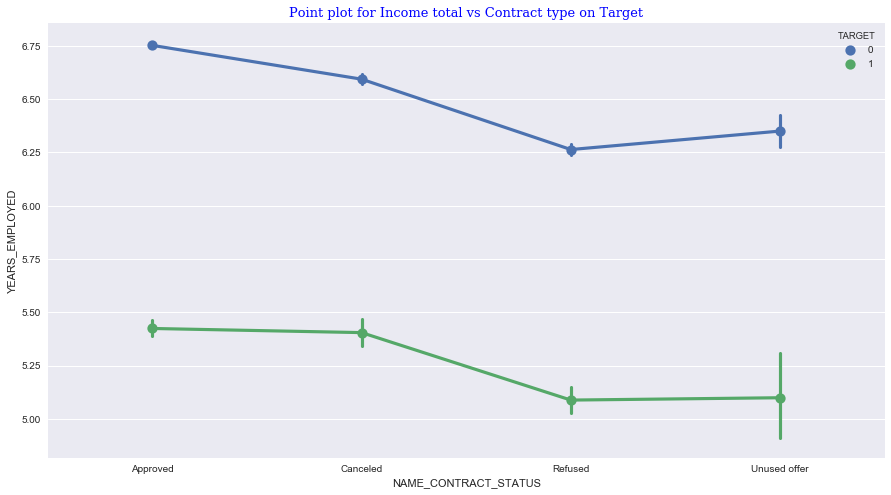

In [184]:
plt.figure(figsize = [15,8])
sns.pointplot('NAME_CONTRACT_STATUS','YEARS_EMPLOYED',hue = 'TARGET', data = merged_data)
plt.title('Point plot for Income total vs Contract type on Target', fontdict= title_font)
plt.show()

#### Observations -:
* In general clients with lower years of employment and previously cancelled offer, tend to default more than usual.

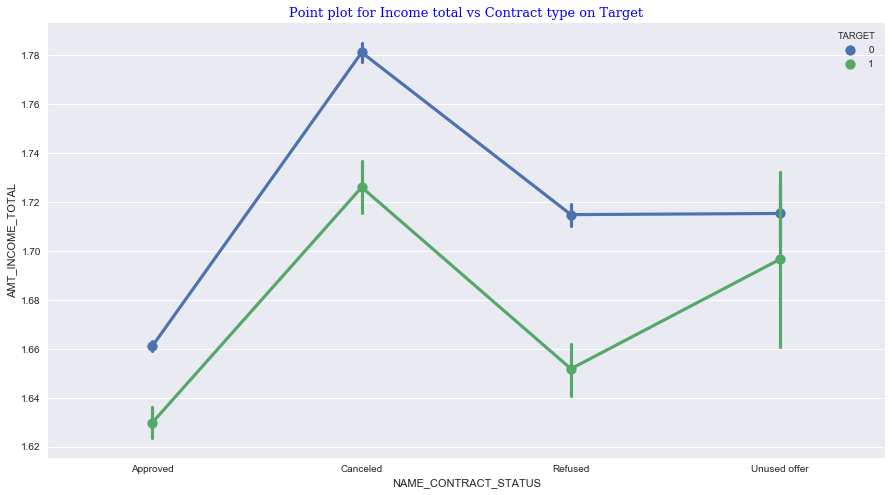

In [185]:
#Let's plot the relation between total income and contract status
plt.figure(figsize = [15,8])
sns.pointplot('NAME_CONTRACT_STATUS','AMT_INCOME_TOTAL',hue = 'TARGET', data = merged_data)
plt.title('Point plot for Income total vs Contract type on Target', fontdict= title_font)
plt.show()

#### Observations -:
* Clients who had an unused offer tend to default on their loan payments even when their income total is sometimes higher than average.

In [186]:
def merged_plot_bar(a,b):
    pd.pivot_table(data=merged_data, index="NAME_CONTRACT_STATUS", columns=a, values="TARGET", aggfunc=np.mean).plot(kind="bar")
    plt.xlabel("")
    plt.ylabel("Payment Difficulty level")
    plt.legend( title=b,fontsize='small')
    plt.show()

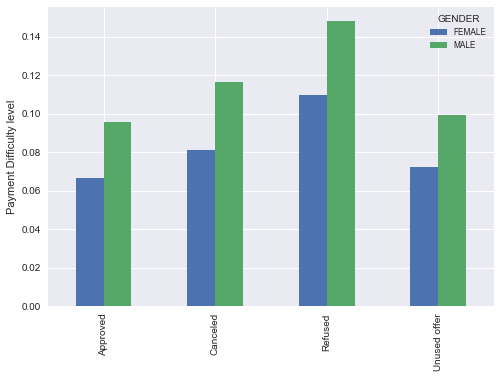

In [187]:
merged_plot_bar('CODE_GENDER','GENDER')

#### Observations -: 
* Males in almost all the cases tend to have more payment difficulties in general making them more prone to defaulting in some cases.
* Also when they have a previously refused loan that tendency increases further.

# ----------------------------------------------------------------------------------------------------------------

# ------------------------------------------- CONCLUSION ---------------------------------------------

# ----------------------------------------------------------------------------------------------------------------

## By analysing the data thoroughly we have can say that there are some driving factors and attributes that can help us in determining whether the client is likely to repay or default.

### Factors contributing to understand if the client will repay the loan-:

* YEARS_EMPLOYED - Clients that have an experience of over 40 years are likely to repay the loan payments.
* AGE - This attribute clearly tells us that people over the age of 50 years are less likely to default on their loan payments.
* AMT_INCOME_TOTAL - Clients with Income more than 700,000 are less likely to default on their loan payments.
* NAME_INCOME_TYPE - Students and Businessmen have nearly null default history.

### Factors contributing to understand if the client will default on loan payments-:
* CODE_GENDER - Men are more likely to default on their loan payments.
* NAME_INCOME_TYPE - Clients who are either at Maternity leave OR Unemployed are more susceptible to default on their loan payments.
* OCCUPATION_TYPE - Low-skill Laborers, Drivers and Waiters/barmen staff, Security staff, Laborers and Cooking staff are more probable of defaulting on their loan payments.
* AGE - clients who are in between the age group of 20-40 are more likely to default on their loan payments.
* YEARS_EMPLOYED: People with less than 5 years of employment at the time of application havea a high default rate.